# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучаем файл с данными

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sbn

In [5]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
data.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0        51.00      8          NaN   False   
1             NaN          11.0        18.60      1          NaN   False   
2             NaN           5.0        34.30      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0        32.00     13          NaN   False   
5             NaN          12.0        14.40      5          NaN   False   
6             NaN          26.0        10.60      6          NaN   False   
7             NaN          24.0          NaN     22          NaN   False   
8             NaN          27.0        15.43     26          NaN   False   
9            2.50           9.0        43.60      7          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00      NaN            Санкт-Петербург   
1      False         11.00      2.0             посёлок Шушары   
2      False          8.30      0.0            Санкт-Петербург   
3      False           NaN      0.0            Санкт-Петербург   
4      False         41.00      NaN            Санкт-Петербург   
5      False          9.10      NaN  городской посёлок Янино-1   
6      False         14.40      1.0          посёлок Парголово   
7      False         18.90      2.0            Санкт-Петербург   
8      False          8.81      NaN             посёлок Мурино   
9      False          6.50      2.0            Санкт-Петербург   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
3           28098.0               6800.0               2.0           84.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   
6           52996.0              19143.0               0.0            NaN   
7           23982.0              11634.0               0.0            NaN   
8               NaN                  NaN               NaN            NaN   
9           50898.0              15008.0               0.0            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
0               2.0          755.0              NaN  
1               0.0            NaN             81.0  
2               2.0          574.0            558.0  
3               3.0          234.0            424.0  
4               1.0           48.0            121.0  
5               NaN            NaN             55.0  
6               0.0            NaN            155.0  
7               0.0            NaN              NaN  
8               NaN            NaN            189.0  
9               0.0            NaN            289.0

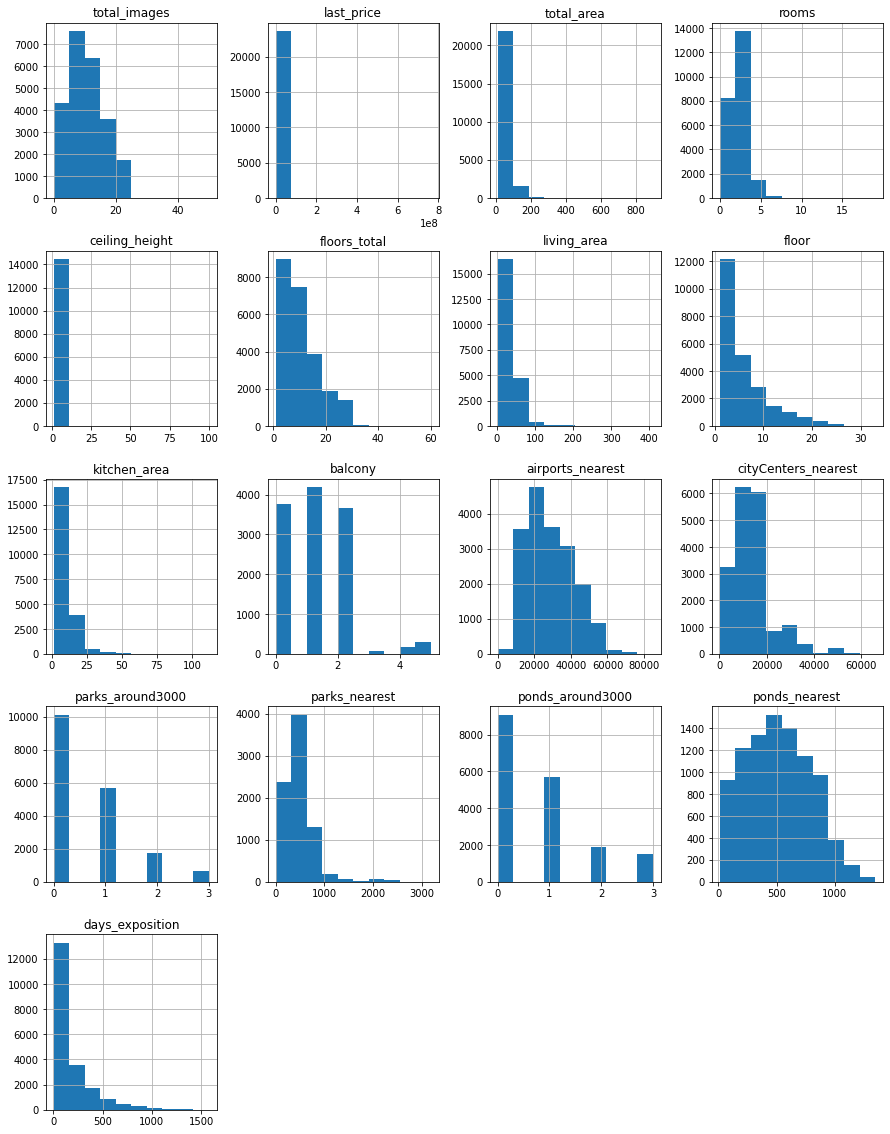

In [6]:
data.hist(figsize=(15, 20));

Исходя из предварительной,  поверхностной оценки даннных предстоит довольно много работы в части подготовки данных к анализу, так как данные содержат много пропусков и не понятна природа некоторых значений.  

### Предобработка данных

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В исходных данных много пропущенных значений - нужно будет просмотреть 14 столбцов. Также необходимо будет изменить тип данных как минимум в в столбцах, где подразумеваются булевы величины, дата и можно округлить до целых значений.

In [9]:
data['is_apartment'] = data['is_apartment'].astype(bool)
data['is_apartment'].unique()

array([ True, False])

Изменив тип данных в столбце is_apartment в булевый мы таким образом заполнили пропуски, так как пропущенные значения преобразовались в False. В столбце first_day_exposition формат поменяем на дату и заполним пропущенные 
значения нулями. Вероятно отсутствие значений в столбце с днями размещения говорит о том, что квартира не продана, заменим на 0.

In [10]:
data['first_day_exposition'] = pd.to_datetime( data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head(5)

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

В столбце с количеством балконов пропущенные значения заполним нулями (отсутствие значений скорее всего указывает 
на то, что балконов нет) и поменяем тип данных на целые числа.

In [11]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

В столбцы с количеством парков и водоемов, а также расстоянием можно поменять тип данных на целые числа. Пропущенные значения вероятно  означают, отсуствие тех или иных объектов, поэтому их можно заполнить нулями. Пропуски в столбцах с картографическими данными заполнять не будем.

In [12]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

In [13]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

In [14]:
data[data['ceiling_height'].isna()].head()
(len(data[data['ceiling_height'].isna()])/len(data))*100

38.799105447487236

почти 40% пропусков в солбце с высотой потолков - не думаю, что это те данные, которыми можно пренебречь. Но пока не понятно, как их восстановить. Заполним нулями и вернемся позже.

In [15]:
data['ceiling_height'] = data['ceiling_height'].fillna(0)

In [16]:
data[data['floors_total'].isna()].head(40)
(len(data[data['floors_total'].isna()])/len(data))*100

0.36288450989493226

всего 0,3% данных и много в распространненом Санкт-Петербурге. Думаю, этими данными безболезненно можно пренебречь:

In [17]:
data = data[~data['floors_total'].isna()]
len(data[data['floors_total'].isna()])

0

In [18]:
data[data['living_area'].isna()].head(5)
(len(data[data['living_area'].isna()])/len(data))*100

7.919366450683945

8% отсутствующих данных по жилой площади это прилично, но пока не понятно, что с этим делать. Заменим пока NAN на ноль и вернемся позже.

In [19]:
data['living_area'] = data['living_area'].fillna(0)

аналогично поступим с площадью кухни:

In [20]:
data[data['kitchen_area'].isna()].head(5)
(len(data[data['kitchen_area'].isna()])/len(data))*100

9.448185321644857

In [21]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [22]:
data[data['locality_name'].isna()].head()
(len(data[data['locality_name'].isna()])/len(data))*100

0.2032778554186253

0,2% отсуствующих данных - не критично, удалим эти строки:

In [23]:
data = data[~data['locality_name'].isna()]

Посмотрим, что у нас теперь с пропусками:

In [24]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Итак, мы решили картографические данные и количество дней в продаже не пытаться восстановить, а заполнить пропуски нулями. Высоту потолков, жилую площадь и площадь кухни заменили на нули так как, предполагаем, что эти данные можно попробовать усреднить и восстановить.

Высоту потолков можно было бы заполнить средним по населенному пункту. Но для этого нам сначала лучше проверить этот столбец на аномалии:

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Есть одни и те же наименования, записанные по разному. Например, поселок через букву е и букву ё. 
Заменим на единое написание:

In [26]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Также, думаю, можно сгруппировать данные, чтобы привести все к единым названиям. 
Для начала проведем еще ряд замен.

In [27]:
data['locality_name'] = data['locality_name'].str.replace('городской поселок' , 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа' , 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок' , 'поселок')
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество' , 'поселок')
data['locality_name'] = data['locality_name'].str.replace('деревня' , 'село')
data['locality_name'] = data['locality_name'].str.replace('  ' , ' ')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'село Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'село Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'село Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'поселок Новая Ропша', 'Павловск', 'село Пикколово', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'село Куттузи',
       'поселок Аннино', 'поселок Ефимовский', 'поселок Плодовое',
       'село Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'село Старая',
       'село Лесколово', 'поселок Новый Свет', 'Сланцы', 'село Путилово',
       'Ивангород', 'Мурино', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'село Оржицы', 'село

Теперь создадим функцию для группировки данных в отдельном столбце:

In [28]:
def location_type(row):
        if 'поселок' in row:
            return 'Поселок'
        elif 'село ' in row:
            return 'Село/Деревня'
        return 'Город'
    
data['locality_type'] = data['locality_name'].apply(location_type)

На всякий случай проверим датафрейм на наличие дублирующих строк:

In [29]:
data.duplicated().sum()

0

Теперь можно заняться высотой потолков. 

In [30]:
data['ceiling_height'].describe()

count    23565.000000
mean         1.702990
std          1.672728
min          0.000000
25%          0.000000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

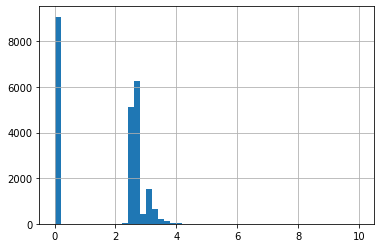

In [31]:
data['ceiling_height'].hist(bins=50, range = (0, 10));

Насколько сильно высота потолков влияет на стоимость:

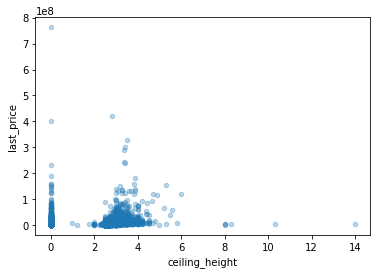

In [32]:
data[data['ceiling_height'] < 20].plot(x='ceiling_height', y='last_price', kind='scatter', alpha=0.3);

Судя по всему не сильно. Поэтому, как предполагали, заменим пропущенные значения медианным по населенному пункту:

In [33]:
for l in data['locality_name'].unique():
    data.loc[(data['locality_name'] == l) & (data['ceiling_height'] == 0), 'ceiling_height'] = \
    data.loc[(data['locality_name'] == l), 'ceiling_height'].median()

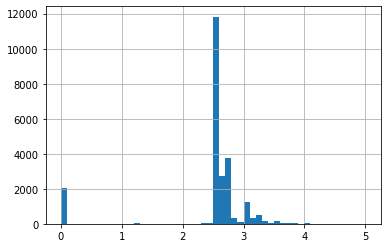

In [34]:
data['ceiling_height'].hist(bins=50, range = (0, 5));

Видимо по части населенных пунктов высота потолков совсем не была указана. 
Думаю, такими данными, в данном случае можно пренебречь.

In [35]:
data = data[data['ceiling_height'] != 0]

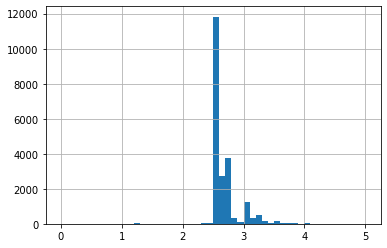

In [36]:
data['ceiling_height'].hist(bins=50, range = (0, 5));

С пропусками в высоте потолков разобрались, перейдем к столбцу с жилой площадью. Посмотрим, что за помещения с нулевой жилой площадью:

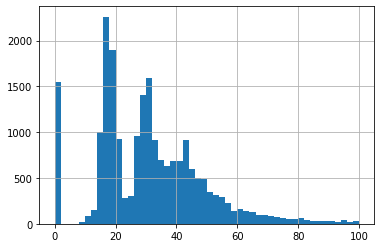

In [37]:
data['living_area'].hist(bins=50, range = (0, 100));

In [38]:
data['ceiling_height'].describe()

count    21520.000000
mean         2.691747
std          1.046077
min          1.000000
25%          2.540000
50%          2.550000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [39]:
data[data['living_area'] == 0].pivot_table(index='locality_type', columns=['is_apartment', 'studio', 'open_plan'], values='total_area', \
aggfunc=['median', 'count'])

median                    count                    
is_apartment   False True               False   True             
studio         False False        True  False   False       True 
open_plan      False False  True  False False   False True  False
locality_type                                                    
Город          47.45  54.6  92.15  26.0  84.0  1309.0   4.0   5.0
Поселок        64.00  47.5    NaN   NaN   6.0    92.0   NaN   NaN
Село/Деревня   61.70  46.0    NaN   NaN   6.0    44.0   NaN   NaN

У нас получается, что жилая площадь не указана в основном в квартирах. И не видно каких-то закономерностей - скорее всего эту графу просто не заполнили. Посмотрим, как это можно скорректировать.Для начала давайте сделаем столбец с указанием типа жилья:

In [40]:
data['realty_type'] = data['is_apartment'].replace(True, "Квартира").replace(False, "") + data['studio'].replace(True, "Студия").replace(False, "") + data['open_plan'].replace(True, "Открытая планировка").replace(False, "")

In [41]:
data['realty_type'] = data['realty_type'].replace('', "Другое").replace('КвартираСтудия', 'Студия').replace('КвартираОткрытая планировка','Открытая планировка') 

In [42]:
data['realty_type'].unique()

array(['Квартира', 'Другое', 'Студия', 'Открытая планировка'],
      dtype=object)

Теперь можем посчитать среднее соотношение жилой площади к общей:

In [43]:
data_pivot_1 = data.query('living_area == 0').pivot_table(index='realty_type', values=['living_area', 'total_area'], \
aggfunc='median')

In [44]:
data_pivot_1.columns = ['Жилая площадь', 'Общая площадь']

In [45]:
data_pivot_1['Доля'] = data_pivot_1['Жилая площадь']/ data_pivot_1['Общая площадь']
data_pivot_1

Жилая площадь  Общая площадь  Доля
realty_type                                            
Другое                         0.0          50.55   0.0
Квартира                       0.0          54.00   0.0
Открытая планировка            0.0          92.15   0.0
Студия                         0.0          26.00   0.0

Теперь можем заменить незаполненные значени, пересчитав из расчёта средней доли от общей площади по типу жилья:

In [46]:
data_pivot_1 = data.query('living_area == 0').pivot_table(index='realty_type', values=['living_area', 'total_area'], \
aggfunc='median')

In [47]:
data['Living_%'] = data['living_area']/data['total_area']

In [48]:
for t in data['realty_type'].unique():
    data.loc[(data['realty_type'] == t), 'Living_%'] = data.loc[(data['realty_type'] == t), 'Living_%'].mean()

In [49]:
len(data.query('living_area == 18'))

780

In [50]:
for t in data['realty_type'].unique():
    data.loc[(data['realty_type'] == t) & (data['living_area'] == 0),'living_area'] \
    = data.loc[(data['realty_type'] == t) & (data['living_area'] == 0),'total_area'] \
    * data.loc[(data['realty_type'] == t) & (data['living_area'] == 0),'Living_%']

In [51]:
len(data.query('living_area == 18'))

780

In [52]:
data.query('living_area == 0').pivot_table(index='realty_type', values=['living_area', 'total_area'], \
aggfunc='median')

Empty DataFrame
Columns: []
Index: []

Готово, аналогично заменим пропущенные значения для площади кухни:

In [53]:
data_pivot_2 = data.query('kitchen_area == 0').pivot_table(index='realty_type', values=['studio', 'is_apartment', 'open_plan'], aggfunc='sum')
data_pivot_2

is_apartment  open_plan  studio
realty_type                                         
Другое                          0          0       0
Квартира                     1554          0       0
Открытая планировка            38         45       0
Студия                        102          0     113

К квартирах с открытой планировкой и студиях по идее площадь кухни и не должна отдельно указываться.То есть нам нужно в квартирах и не квартирах заполнить пропуски.

In [54]:
data['kitchen_%'] = data['kitchen_area'] / data['total_area']

In [55]:
for i in data['realty_type'].unique():
    data.loc[(data['realty_type'] == i), 'kitchen_%'] = data.loc[(data['realty_type'] == i), 'kitchen_%'].mean()

In [56]:
for i in data['realty_type'].unique():
    data.loc[(data['realty_type'] == i) & (data['kitchen_area'] == 0),'kitchen_area'] \
    = data.loc[(data['realty_type'] == i) & (data['kitchen_area'] == 0),'total_area'] \
    * data.loc[(data['realty_type'] == i) & (data['kitchen_area'] == 0),'kitchen_%']

In [57]:
data_pivot_2 = data.query('kitchen_area == 0').pivot_table(index='realty_type', values=['studio', 'is_apartment', 'open_plan'], aggfunc='sum')
data_pivot_2

is_apartment  open_plan  studio
realty_type                                         
Открытая планировка            38         45       0
Студия                        102          0     113

Итак, замены, где возможно, сделали. Без указания площади кухни остались студи и квартиры с общей планировкой. Удалять их из анализа нецелесообразно.

Таким образом, везде, где возможно, пропуски заполнены.

Проведем проверку данных на предмет аномальных и выбивающихся значений. Сократим выборку, где необходимо.

Проверим остальные столбцы на предмет наличия выбивающихся значений:

In [58]:
data['last_price'].describe()

count    2.152000e+04
mean     6.851713e+06
std      1.135847e+07
min      1.219000e+04
25%      3.599000e+06
50%      4.800000e+06
75%      7.000000e+06
max      7.630000e+08
Name: last_price, dtype: float64

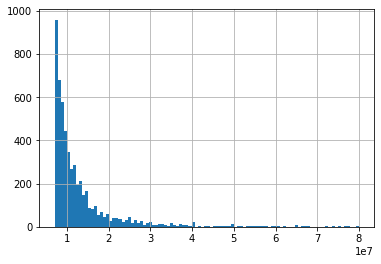

In [59]:
data['last_price'].hist(bins=100, range=(7000000, 80000000));

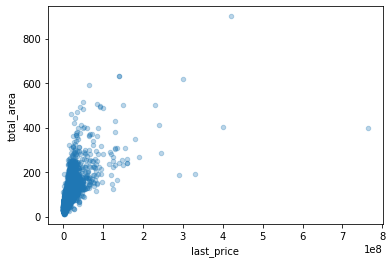

In [60]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3);

Получается, что и в общей жилой площади данные сконцентрированы в определенном диапазоне и много выбивающихся значений. Можно проанализировать сколько таких значений, и,  если их немного, то удалить. 

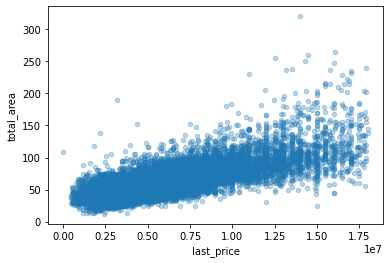

In [61]:
data[data['last_price'] < 18000000].plot(x='last_price', y='total_area', kind='scatter', alpha=0.3);

Вот так выборка выглядит более цельной, посмотрим сколько % данных мы отсеим таким образом

In [62]:
(len(data[data['last_price'] < 18000000])/len(data))*100

95.94795539033457

4% - можем сократить выбивающиеся значения сверху.

In [63]:
data = data[data['last_price'] < 18000000]

Что у нас снизу:

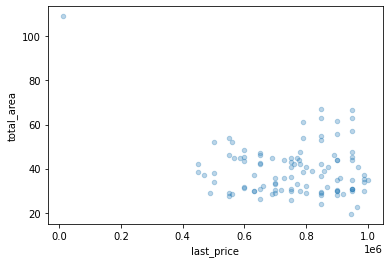

In [64]:
data[data['last_price'] < 1000000].plot(x='last_price', y='total_area', kind='scatter', alpha=0.3);

In [65]:
(len(data[data['last_price'] < 1000000])/len(data))*100

0.5133669120495932

0.5% тоже можем не учитывать:

In [66]:
data = data[data['last_price'] > 1000000]

In [67]:
data['last_price'].describe()

count    2.053100e+04
mean     5.548961e+06
std      3.027045e+06
min      1.010000e+06
25%      3.550000e+06
50%      4.700000e+06
75%      6.700000e+06
max      1.799800e+07
Name: last_price, dtype: float64

In [68]:
(data['last_price'].mean()/data['last_price'].median() -1) * 100

18.06301033413924

В целом данные выглядят хорошо, распределение нормальное. Хотя и расхождение между средним и медианным значением в 20% довольно большое, но это вызвано, что разброс по стоимости квартир велик в денежном эквиваленте. 

In [69]:
data['total_area'].describe()

count    20531.000000
mean        57.008251
std         24.004566
min         12.000000
25%         40.100000
50%         51.600000
75%         68.000000
max        320.000000
Name: total_area, dtype: float64

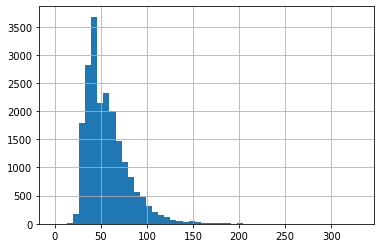

In [70]:
data['total_area'].hist(bins=50, range=(0, 330));

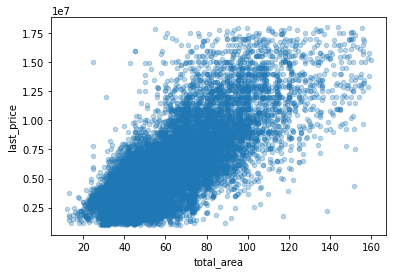

In [71]:
data[data['total_area'] < 160].plot(x='total_area', y='last_price', kind='scatter', alpha=0.3);

In [72]:
(len(data[data['total_area'] < 160])/len(data))*100

99.50319029759875

In [73]:
data = data[data['total_area'] < 160]

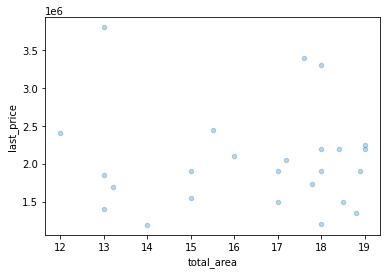

In [74]:
data[data['total_area'] < 20].plot(x='total_area', y='last_price', kind='scatter', alpha=0.3);

In [75]:
(len(data[data['total_area'] < 20])/len(data))*100

0.12237505506877477

In [76]:
data = data[data['total_area'] > 20]

In [77]:
data['total_area'].describe()

count    20398.000000
mean        56.401835
std         22.000163
min         20.100000
25%         40.100000
50%         51.400000
75%         67.500000
max        159.900000
Name: total_area, dtype: float64

In [78]:
(data['total_area'].mean()/data['total_area'].median() -1) * 100

9.731196466579672

С данными по общей площади тоже все ок, расхождение среднего и медианного в 10% не большое, учитывая количество данных.

In [79]:
data['rooms'].describe()

count    20398.000000
mean         2.018384
std          0.952109
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Количество комнат 0 вероятно не аномалия. Это корректно, если это студия или у квартиры свободная планировка. Проверим эту гипотезу:

In [80]:
data.pivot_table(index='rooms', values=['studio', 'open_plan'], aggfunc='sum')

open_plan  studio
rooms                   
0             34      99
1              3       7
2              1       0
3              2       0
4              1       0
5              0       0
6              0       0
7              0       0
8              0       0

In [81]:
data.query('rooms == 0')['rooms'].count() 

133

Гипотеза верна.

In [82]:
(data['rooms'].mean()/data['rooms'].median() -1) * 100

0.9192077654672115

С данными по количеству комнат всё в порядке.

In [83]:
data['ceiling_height'].describe()

count    20398.000000
mean         2.678847
std          1.067331
min          1.000000
25%          2.540000
50%          2.550000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

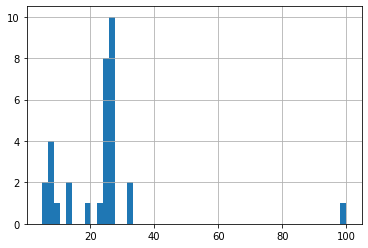

In [84]:
data['ceiling_height'].hist(bins=50, range=(5,100));

In [85]:
data.query('ceiling_height > 4')['ceiling_height'].value_counts().sort_index(ascending=False).head(15)

100.0    1
32.0     2
27.5     1
27.0     8
26.0     1
25.0     7
24.0     1
22.6     1
20.0     1
14.0     1
13.5     1
10.3     1
8.3      1
8.0      3
5.8      1
Name: ceiling_height, dtype: int64

Странные значения, вряд ли высота потолков может быть больше 5 метров, если только это не завод или типа того. 

In [86]:
data_pivot_3 = data.query('ceiling_height > 5').pivot_table(index='realty_type', values=['ceiling_height', 'total_area'], \
aggfunc=['median', 'count'])
data_pivot_3

median                     count           
                    ceiling_height total_area ceiling_height total_area
realty_type                                                            
Другое                        26.0       43.5             10         10
Квартира                      24.5       50.0             20         20
Открытая планировка           27.0       25.0              1          1
Студия                         5.8       71.0              1          1

5,8 метра еще может быть похоже на правду - единичный случай и площадь большая для студии. 

In [87]:
data_pivot_3 = data.query('ceiling_height > 6 and ceiling_height < 20').pivot_table(index= ['realty_type', 'locality_type'], values=['ceiling_height', 'total_area'], \
aggfunc=['median', 'count'])
data_pivot_3

median                     count           
                          ceiling_height total_area ceiling_height total_area
realty_type locality_type                                                    
Другое      Село/Деревня             8.0       30.0              1          1
Квартира    Город                    8.3       54.0              5          5
            Село/Деревня            13.5       42.0              1          1

В этом диапазон значения уж очень странные. Возможно, внесены по ошибке. Их мало - можно ими пренебречь.

In [88]:
data_pivot_3 = data.query('ceiling_height > 20').pivot_table(index= ['realty_type', 'locality_type'], values=['ceiling_height', 'total_area'], \
aggfunc=['median', 'count'])
data_pivot_3

median                     count  \
                                  ceiling_height total_area ceiling_height   
realty_type         locality_type                                            
Другое              Город                   26.0       49.1              6   
                    Поселок                 27.0       44.0              3   
Квартира            Город                   25.5       45.0             10   
                    Село/Деревня            27.0       76.0              2   
Открытая планировка Поселок                 27.0       25.0              1   

                                              
                                  total_area  
realty_type         locality_type             
Другое              Город                  6  
                    Поселок                3  
Квартира            Город                 10  
                    Село/Деревня           2  
Открытая планировка Поселок                1

Здесь вероятно данные могли быть перенесены некорректно (кроме пика в 100 - вероятно ошибка), точка сместилась вправо. В любом случае, этих данных немного  и мы сильно не потеряем, если примем эту гипотезу и исправим данные:

In [89]:
data = data[data['ceiling_height'] != 100]

In [90]:
data['ceiling_height'] = np.where(data['ceiling_height'] >= 20, data['ceiling_height']/10, data['ceiling_height'])

In [91]:
data = data[data['ceiling_height'] <= 5.8]

Готово, а  что с выбросами в меньшую сторону:

In [92]:
data.query('ceiling_height < 2')['ceiling_height'].value_counts()

1.250    36
1.300     3
1.290     3
1.275     2
1.385     1
1.750     1
1.350     1
1.000     1
1.200     1
Name: ceiling_height, dtype: int64

In [93]:
data_pivot_3 = data.query('ceiling_height < 2').pivot_table(index= ['realty_type', 'locality_type'], values=['ceiling_height', 'total_area'], \
aggfunc=['median', 'count'])
data_pivot_3

median                     count           
                          ceiling_height total_area ceiling_height total_area
realty_type locality_type                                                    
Другое      Поселок                1.250      48.00              3          3
            Село/Деревня           1.250      46.00              2          2
Квартира    Город                  1.375      47.50              2          2
            Поселок                1.250      45.00             22         22
            Село/Деревня           1.250      41.65             20         20

Вряд ли могут быть такие низкие потолки. Здесь тоже похоже на неправильный перенос данных. попробуем их тоже исправить. 

In [94]:
data['ceiling_height'] = np.where(data['ceiling_height'] <= 1.75, (data['ceiling_height'] - 1)*10, data['ceiling_height'])

In [95]:
data = data[data['ceiling_height'] > 1.75]

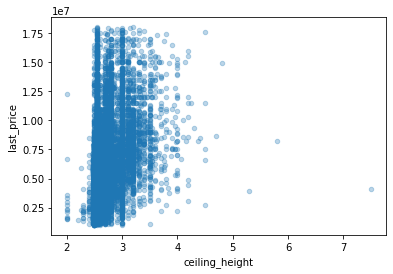

In [96]:
data.plot(x='ceiling_height', y='last_price', kind='scatter', alpha=0.3);

Можно еще сократить выборку.

In [97]:
data = data[data['ceiling_height'] < 4.2]

In [98]:
data = data[data['ceiling_height'] > 2.2]

In [99]:
(data['total_area'].mean()/data['total_area'].median() -1) * 100

9.705154561919404

Распределение по высоте потолков не совсем нормальное (возможно часть данных всё-таки не совсем корректна), но разница между средним и медианой в 10% доволно небольшая.

In [100]:
data['floors_total'].describe()

count    20354.000000
mean        10.600275
std          6.408841
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

In [101]:
(data['total_area'].mean()/data['total_area'].median() -1) * 100

9.705154561919404

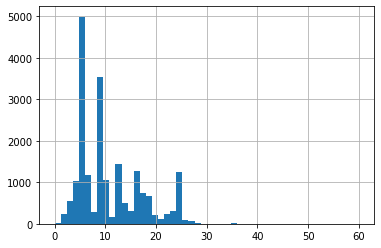

In [102]:
data['floors_total'].hist(bins=50, range=(0,60));

In [103]:
data = data[data['floors_total'] < 30]

In [104]:
(data['total_area'].mean()/data['total_area'].median() -1) * 100

9.692062681851521

Немного скорректироваои выборку по количеству этажей. 

In [105]:
data['floor'].describe()

count    20323.000000
mean         5.772573
std          4.709684
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

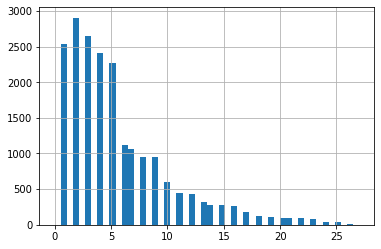

In [106]:
data['floor'].hist(bins=50, range=(0,27));

In [107]:
(data['total_area'].mean()/data['total_area'].median() -1) * 100

9.692062681851521

Распределение похоже на нормальное.

In [108]:
data['living_area'].describe()

count    20323.000000
mean        32.249359
std         14.985505
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max        128.000000
Name: living_area, dtype: float64

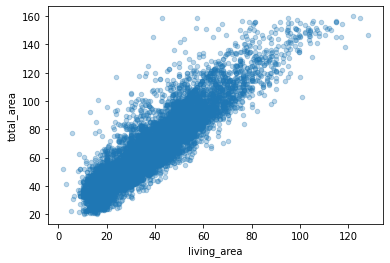

In [109]:
data.plot(x='living_area', y='total_area', kind='scatter', alpha=0.3);

In [110]:
(len(data[data['living_area'] < 90])/len(data))*100

99.47842346110318

In [111]:
(len(data[data['living_area'] < 10])/len(data))*100

0.1082517344880185

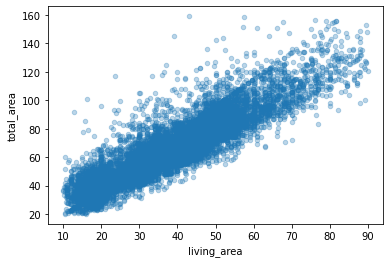

In [112]:
data.query('living_area > 10 and living_area < 90').plot(x='living_area', y='total_area', kind='scatter', alpha=0.3);

In [113]:
(data['total_area'].mean()/data['total_area'].median() -1) * 100

9.692062681851521

In [114]:
data['kitchen_area'].describe()

count    20323.000000
mean         9.874371
std          4.538525
min          0.000000
25%          7.000000
50%          9.000000
75%         11.381475
max         64.000000
Name: kitchen_area, dtype: float64

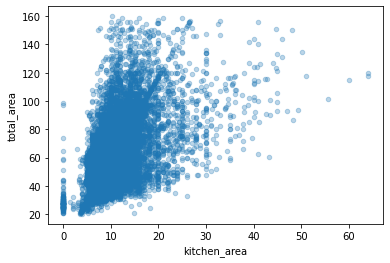

In [115]:
data.plot(x='kitchen_area', y='total_area', kind='scatter', alpha=0.3);

In [116]:
(len(data[data['kitchen_area'] < 32])/len(data))*100

99.47842346110318

In [117]:
(data['total_area'].mean()/data['total_area'].median() -1) * 100

9.692062681851521

In [118]:
data['airports_nearest'].describe()

count    16593.000000
mean     28785.680046
std      12610.181657
min          0.000000
25%      18428.000000
50%      26995.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [119]:
data.query('airports_nearest == 0')

total_images  last_price  total_area first_day_exposition  rooms  \
21085             0   7000000.0        34.7           2018-09-23      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
21085             2.7           9.0         19.8      3          True   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
21085      False           6.0        2  Санкт-Петербург               0.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
21085              22801.0                 0            NaN                 0   

       ponds_nearest  days_exposition locality_type realty_type  Living_%  \
21085            NaN             60.0         Город    Квартира  0.522773   

       kitchen_%  
21085   0.169873

У нас есть одно значение, равное нули. Не совсем понятно, то ли это сбой, то ли эта квартира в аэропорту, но тогда все равно этого мало для статистики, удалим эту аномалию.

In [120]:
data = data.query('airports_nearest != 0')

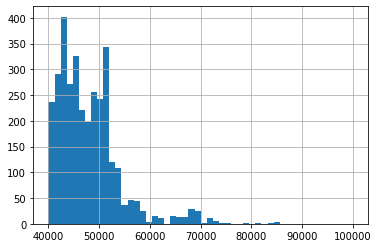

In [121]:
data[data['airports_nearest'] > 40000]['airports_nearest'].hist(bins=50, range = (40000, 100000));

Много выбросов, немного скорректируем выборку:

In [122]:
data = data[(data['airports_nearest'].isna()) | (data['airports_nearest'] < 60000)]

In [123]:
(data['airports_nearest'].mean()/data['airports_nearest'].median() -1) * 100

5.953814474315355

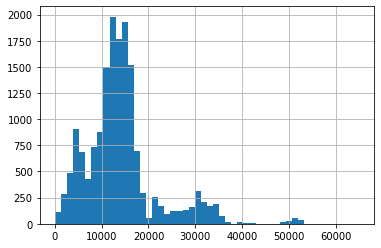

In [124]:
data['cityCenters_nearest'].hist(bins=50, range = (0, 65000));

In [125]:
data = data[(data['cityCenters_nearest'].isna()) | (data['cityCenters_nearest'] < 45000)]

In [126]:
(data['cityCenters_nearest'].mean()/data['cityCenters_nearest'].median() -1) * 100

5.170553664671873

In [127]:
data['parks_nearest'].describe()

count    7177.000000
mean      496.075658
std       341.239085
min         1.000000
25%       294.000000
50%       458.000000
75%       617.000000
max      3190.000000
Name: parks_nearest, dtype: float64

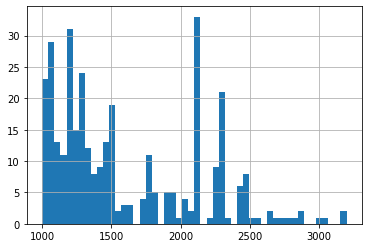

In [128]:
data[data['parks_nearest'] > 1000]['parks_nearest'].hist(bins=50, range = (1000, 3200));

In [129]:
(data['parks_nearest'].mean()/data['parks_nearest'].median()-1) * 100

8.313462522504867

In [130]:
data['ponds_nearest'].describe()

count    7975.000000
mean      529.226082
std       277.592137
min        13.000000
25%       309.000000
50%       516.000000
75%       741.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

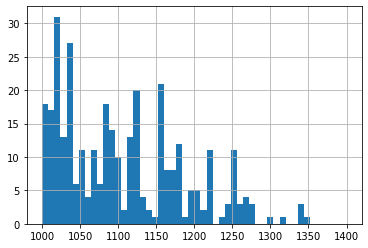

In [131]:
data['ponds_nearest'].hist(bins=50, range = (1000, 1400));

In [132]:
(data['ponds_nearest'].mean()/data['ponds_nearest'].median()-1) * 100

2.5631940900585626

Ну вот, данные во всех столбцах проверили на предмет наличия пропусков, аномалий, дубликатов. Удалили выбивающиеся значения, где это возможно, подготовив данные для анализа.

Добавим столбец с ценой одного квадратного метра:

In [133]:
data['square_metre_price'] = data['last_price'] / data['total_area']

Создадим столбец с днями недели, в которые было размещено объявление:

In [134]:
data['weekday_of_advert'] = data['first_day_exposition'].dt.weekday

In [135]:
weekday = pd.Series(["Понедельник","Вторник","Среда","Четверг", "Пятница", "Суббота", "Воскресенье"])

In [136]:
for w in data['weekday_of_advert'].unique():
    data.loc[data['weekday_of_advert'] == w, 'weekday_of_advert'] = weekday[w]

In [137]:
data['weekday_of_advert'].head(10)

0         Четверг
2         Четверг
4         Вторник
7         Четверг
9     Воскресенье
10        Четверг
12        Четверг
13        Суббота
14        Четверг
15        Суббота
Name: weekday_of_advert, dtype: object

Создадим столбцы с месяцем и годом размещения объявления:

In [138]:
data['month_of_advert'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [139]:
data['year_of_advert'] = pd.DatetimeIndex(data['first_day_exposition']).year

И с помощью цикла создадим столбец с категоризацией количества этажей:

In [140]:
data['floor_type'] = data['floor'].replace(1, 'Первый')

In [141]:
for w in data['floor_type'].unique():
    data.loc[(data['floor_type'] == w) & (data['floors_total'] == w), 'floor_type'] = "Последний"
    data.loc[(data['floor_type'] == w) & (data['floor'] == w), 'floor_type'] = "Другой"

In [142]:
data['floor_type'].head(20)

0        Другой
2        Другой
4        Другой
7        Другой
9        Другой
10       Другой
12    Последний
13    Последний
14       Первый
15       Другой
16       Первый
17       Другой
18       Другой
19       Другой
20       Другой
21       Другой
22       Другой
23    Последний
24       Первый
25       Другой
Name: floor_type, dtype: object

И добавим столбец с растоянием до центра в км.

In [143]:
data['city_centre_km'] = np.round(data['cityCenters_nearest']/1000)

Проверим, что все столбцы добавились.

In [144]:
data.query('year_of_advert == 2018 and month_of_advert == 12 and weekday_of_advert == "Пятница"').pivot_table(index \
= ['year_of_advert', 'month_of_advert', 'weekday_of_advert', 'floor_type'], values=['square_metre_price', 'city_centre_km']).reset_index()

year_of_advert  month_of_advert weekday_of_advert floor_type  \
0            2018               12           Пятница     Другой   
1            2018               12           Пятница     Первый   
2            2018               12           Пятница  Последний   

   city_centre_km  square_metre_price  
0       13.269231       116456.526971  
1        5.666667        90617.987208  
2       16.000000        62097.423510

In [145]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  20027.000000  2.002700e+04  20027.000000  20027.000000    20027.000000   
mean       9.950966  5.525201e+06     56.456873      2.019723        2.648856   
std        5.615692  2.962107e+06     22.014112      0.953089        0.211301   
min        0.000000  1.010000e+06     20.100000      0.000000        2.250000   
25%        6.000000  3.570000e+06     40.200000      1.000000        2.540000   
50%       10.000000  4.700000e+06     51.500000      2.000000        2.550000   
75%       14.000000  6.675000e+06     67.650000      3.000000        2.700000   
max       50.000000  1.799800e+07    159.900000      8.000000        4.190000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  20027.000000  20027.000000  20027.000000  20027.000000  20027.000000   
mean      10.616468     32.273682      5.799071      9.901391      0.611624   
std        6.338960     15.013665      4.722423      4.546873      0.970534   
min        1.000000      2.000000      1.000000      0.000000      0.000000   
25%        5.000000     19.000000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.000000      0.000000   
75%       15.000000     41.000000      8.000000     11.400000      1.000000   
max       29.000000    128.000000     27.000000     64.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      16297.000000         16313.000000      20027.000000    7177.000000   
mean       28261.557894         13784.704469          0.479003     496.075658   
std        12010.399280          7172.402127          0.733278     341.239085   
min         6450.000000           208.000000          0.000000       1.000000   
25%        18271.000000          9767.000000          0.000000     294.000000   
50%        26668.000000         13107.000000          0.000000     458.000000   
75%        36784.000000         16005.000000          1.000000     617.000000   
max        59705.000000         41792.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition      Living_%  \
count      20027.000000    7975.000000     17398.000000  20027.000000   
mean           0.595296     529.226082       180.364525      0.526048   
std            0.866872     277.592137       219.399747      0.012455   
min            0.000000      13.000000         1.000000      0.522773   
25%            0.000000     309.000000        44.000000      0.522773   
50%            0.000000     516.000000        95.000000      0.522773   
75%            1.000000     741.000000       230.000000      0.522773   
max            3.000000    1344.000000      1580.000000      0.655934   

          kitchen_%  square_metre_price  month_of_advert  year_of_advert  \
count  20027.000000        20027.000000     20027.000000    20027.000000   
mean       0.169361        97497.422720         6.394967     2017.382034   
std        0.014545        31042.235064         3.484911        1.036680   
min        0.000000        13483.146067         1.000000     2014.000000   
25%        0.169873        79339.579306         3.000000     2017.000000   
50%        0.169873        96363.636364         6.000000     2017.000000   
75%        0.169873       114285.714286        10.000000     2018.000000   
max        0.175942       387096.774194        12.000000     2019.000000   

       city_centre_km  
count    16313.000000  
mean        13.779808  
std          7.183168  
min          0.000000  
25%         10.000000  
50%         13.000000  
75%         16.000000  
max         42.000000

### Проведём исследовательский анализ данных

Ну что ж, вроде бы теперь данные выглядят корректно. Давайте изучим каждую характеристику в отдельности.

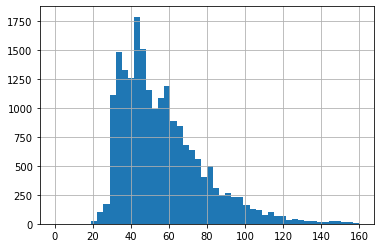

In [146]:
data['total_area'].hist(bins=50, range = (0, 160));

Похоже на распределение Пуассона - при увеличении количества исследований данные скорее всего будут стремиться к нормальному. Медианное значение приходится на недвижимость площадью 50 кв.м. А что если нам посмотреть площадь в разрезе типа жилья и вида населенного пункта.

In [147]:
data.pivot_table(index= ['realty_type', 'locality_type'], values= 'total_area', aggfunc=['median', 'mean', 'count']).reset_index()

realty_type locality_type     median       mean      count
                                      total_area total_area total_area
0                Другое         Город      53.80  58.934143       2066
1                Другое       Поселок      50.00  52.423871        186
2                Другое  Село/Деревня      54.00  54.411798         89
3              Квартира         Город      52.00  57.148394      15626
4              Квартира       Поселок      47.00  51.012694       1329
5              Квартира  Село/Деревня      46.00  49.713339        587
6   Открытая планировка         Город      28.00  33.029714         35
7   Открытая планировка       Поселок      30.00  30.000000          2
8   Открытая планировка  Село/Деревня      30.50  30.086667          3
9                Студия         Город      27.35  29.349583         96
10               Студия       Поселок      26.70  26.475000          4
11               Студия  Село/Деревня      25.40  25.550000          4

У нас получается, что самая малая средняя площадь у Студий и Квартир с открытой планировкой. У Квартир и Другого типа жилья более менее схожая средняя площадь, но в городах всё-таки площадь квартир в среднем более высокая.

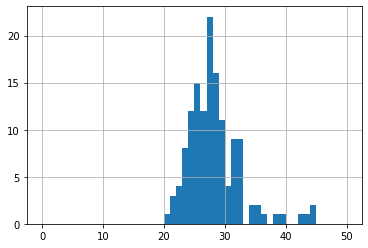

In [148]:
data.query('realty_type == "Студия" or realty_type == "Открытая планировка"')['total_area'].hist(bins=50, range = (0, 50));

Вот здесь мы уже видим распределение больше похожее на нормальное. Посмотрим, что если построить график только для квартир:

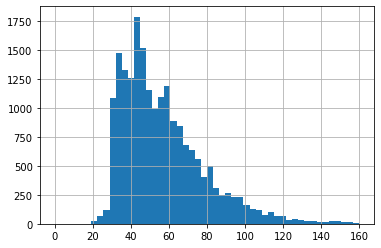

In [149]:
data.query('realty_type == "Квартира" or realty_type == "Другое"')['total_area'].hist(bins=50, range = (0, 160));

Здесь сильных измений не видно так как доля студий в иследованиях мала. Но видимо это говорит о том, что Студии и Квартиры с открытой планировкой лучше анализировать отдельно, тем более что и такой параметр, как площадь кухни у них в принципе будет отсутствовать. Построим диаграммы рассеивания.

In [150]:
data_1 = data[['first_day_exposition', 'total_area', 'locality_name', 'realty_type']]

In [151]:
data_1.head(5)

first_day_exposition  total_area    locality_name realty_type
0           2019-03-07       108.0  Санкт-Петербург    Квартира
2           2015-08-20        56.0  Санкт-Петербург    Квартира
4           2018-06-19       100.0  Санкт-Петербург    Квартира
7           2019-04-18        71.6  Санкт-Петербург    Квартира
9           2017-02-26        61.0  Санкт-Петербург    Квартира

(0.0, 175.0)

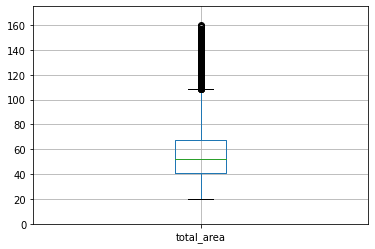

In [152]:
data_1.query('realty_type == "Другое" or realty_type == "Квартира"').boxplot() 
plt.ylim(0,175)

(0.0, 60.0)

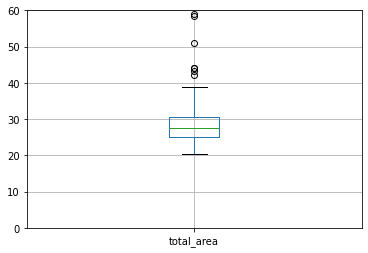

In [153]:
data_1.query('realty_type == "Студия" or realty_type == "Открытая планировка"').boxplot() 
plt.ylim(0,60)

Видим, что и там и там данные распределены довольно равномерно. Есть небольшие выбросы. Можно еще посмотреть на зависимость скорости продажи и стоимости недвижимости от общей площади.

In [154]:
def categorize_area(area):
    try:
        if 0 <= area <= 40:
            return 'Малая площадь'
        elif 41 <= area <= 70:
            return 'Средняя площадь'
        elif area >= 71:
            return 'Большая площадь'
    except:
        pass

In [155]:
data['total_area_category'] = data['total_area'].apply(categorize_area)

In [156]:
data.pivot_table(index= 'total_area_category', values= 'days_exposition', aggfunc=['median', 'mean', 'count']).reset_index()

total_area_category          median            mean           count
                      days_exposition days_exposition days_exposition
0     Большая площадь           134.0      233.996625            3556
1       Малая площадь            75.5      153.736352            4506
2     Средняя площадь            92.0      173.091290            9081

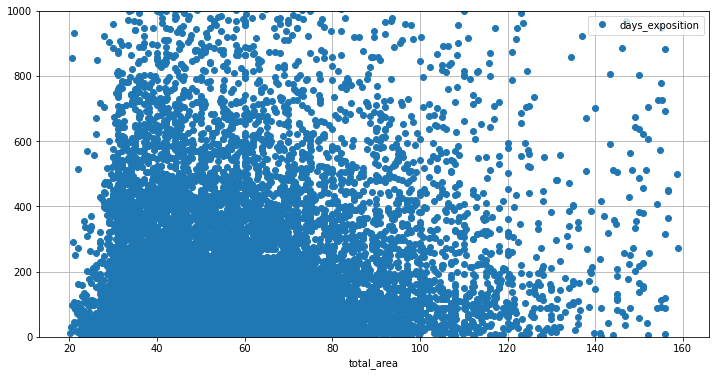

In [157]:
data.plot(x='total_area', y='days_exposition', style='o', ylim=(0, 1000), grid=True, figsize=(12, 6));

Исходя из категоризации у нас получается, что кваритиры с меньшей площадью продаются быстрее, хотя из графика это и не видно. Возможно, что скорость продажи в большей степени зависит от доступности по цене.

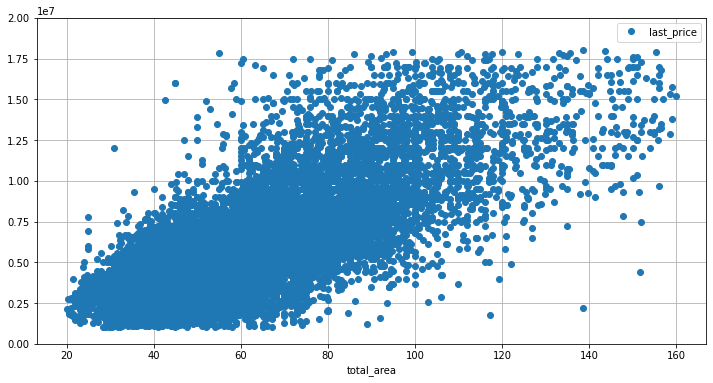

In [158]:
data.plot(x='total_area', y='last_price', style='o', ylim=(0,20000000), grid=True, figsize=(12, 6));

А цена завсит от площади  -  чем больше площадь, тем выше цена. Хотя это, наверное, очевидно.

Посмотрим еще на показатели жилой площади и площади кухни в квартирах и другом типе жилья.

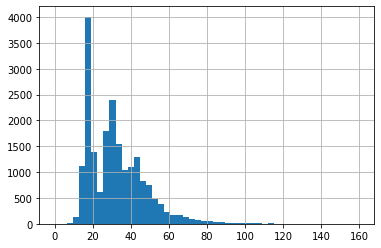

In [159]:
data['living_area'].hist(bins=50, range = (0, 160));

Есть странности в этой гистограмме: пик в районе 18 метров и провал в районе 22 метров. Посмотрим, с чем это может быть связано.

In [160]:
data['living_area'].describe()

count    20027.000000
mean        32.273682
std         15.013665
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max        128.000000
Name: living_area, dtype: float64

In [161]:
data['living_area'].median()

30.0

In [162]:
data_2 = data[['first_day_exposition', 'living_area', 'total_area','kitchen_area','locality_name', 'realty_type']]

(0.0, 70.0)

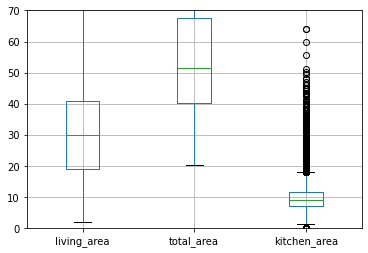

In [163]:
data_2.boxplot() 
plt.ylim(0,70)

In [164]:
data_2['living_area'].value_counts()

18.000000    759
17.000000    557
30.000000    520
20.000000    442
16.000000    386
            ... 
34.760002      1
71.200000      1
71.097124      1
28.840000      1
16.740000      1
Name: living_area, Length: 1933, dtype: int64

Итак, очень часто встречается жилая площадь в 18 метров - может быть это какое-то округление или автоматизм при заполнении данных.

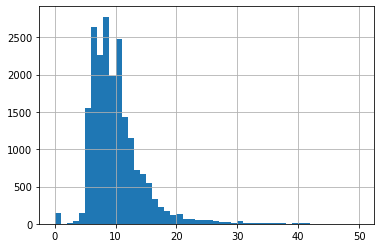

In [165]:
data['kitchen_area'].hist(bins=50, range = (0, 50));

In [166]:
data.query('kitchen_area > 0')['kitchen_area'].describe()

count    19883.00000
mean         9.97310
std          4.48426
min          1.30000
25%          7.00000
50%          9.00000
75%         11.41000
max         64.00000
Name: kitchen_area, dtype: float64

Здесь у нас нет серьезных отклонений (не считая 0, но ранее мы уже выяснили, что это квартиры студии и с открытой планировкой. Распределение стремиться к нормальному, а средня площадь кухни в районе 10 кв. метров. 

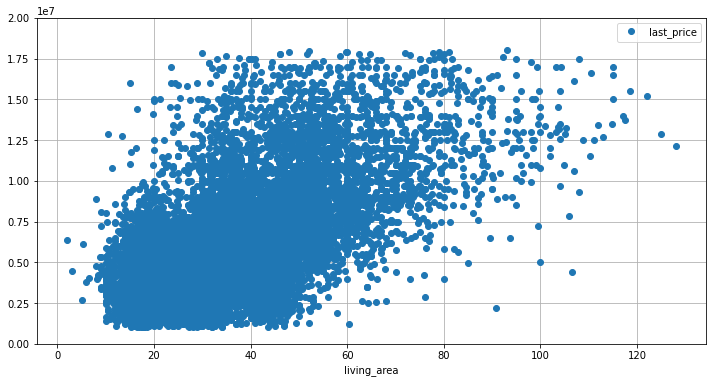

In [167]:
data.plot(x='living_area', y='last_price', style='o', ylim=(0,20000000), grid=True, figsize=(12, 6));

Жилая площадь чуть в меньшей степени, чем общая площадь, положительно влияет на стоимость недвижимости. 

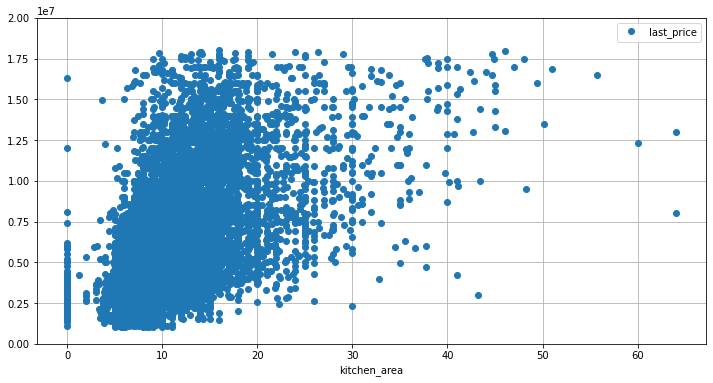

In [168]:
data.plot(x='kitchen_area', y='last_price', style='o', ylim=(0,20000000), grid=True, figsize=(12, 6));

Площадь кухни также влияет на стоимость недвижимости, но в значительно меньшей степени, чем общая и жилая площади.

Рассмотрим данные по стоимости. Разделим столбец со стоимостью на 1 млн, чтобы данные было удобнее читать:

In [169]:
data['last_price'] = data['last_price']/ 1000000

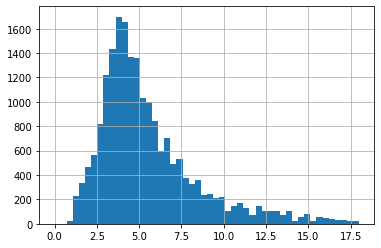

In [170]:
data['last_price'].hist(bins=50, range = (0, 18));

In [171]:
data['last_price'].describe()

count    20027.000000
mean         5.525201
std          2.962107
min          1.010000
25%          3.570000
50%          4.700000
75%          6.675000
max         17.998000
Name: last_price, dtype: float64

In [172]:
data['last_price'].median()

4.7

Довольно большой разброс цены, из-за этого медианное значение и среднее сильно отличаются. Но в целом распределение стремиться к нормальному и с данными, судя по всему, всё в порядке. Посмотрим, как меняются цены по городам и в зависимости от типа жилья.

In [173]:
data.pivot_table(index= 'locality_name', values= 'last_price', aggfunc=['median', 'mean', 'count']).reset_index().sort_values(by=('mean','last_price'), ascending=False)

locality_name     median       mean      count
                         last_price last_price last_price
32       Санкт-Петербург     5.3000   6.255367      14631
35            Сестрорецк     5.4900   6.223668        165
31                Пушкин     5.1250   5.839486        356
205       село Мистолово     3.5800   5.348333          3
183        село Кальтино     5.1995   5.199500          2
..                   ...        ...        ...        ...
230        село Торосово     1.1000   1.100000          1
172  село Борисова Грива     1.1000   1.100000          1
71      поселок Зимитицы     1.1000   1.100000          1
87   поселок Лесогорский     1.0500   1.050000          1
68       поселок Житково     1.0500   1.050000          1

[236 rows x 4 columns]

In [174]:
data.pivot_table(index= 'realty_type', values= 'last_price', aggfunc=['median', 'mean', 'count']).reset_index().sort_values(by=('mean','last_price'), ascending=False)

realty_type     median       mean      count
                       last_price last_price last_price
0               Другое     4.8000   5.620094       2341
1             Квартира     4.7495   5.530420      17542
2  Открытая планировка     3.2275   3.391175         40
3               Студия     3.1500   3.329653        104

Итак, у нас получается, что самая дорогая недвижимость в Санкт-Петербурге, Сестрорецке и Пушкине (средняя стоимость - больше 5 млн.), при этом недвижимость с типом "Другое" в среднем дороже, чем остальные.

Насколько сильно стоимость влияет на скорость продоваемости недвижимости:

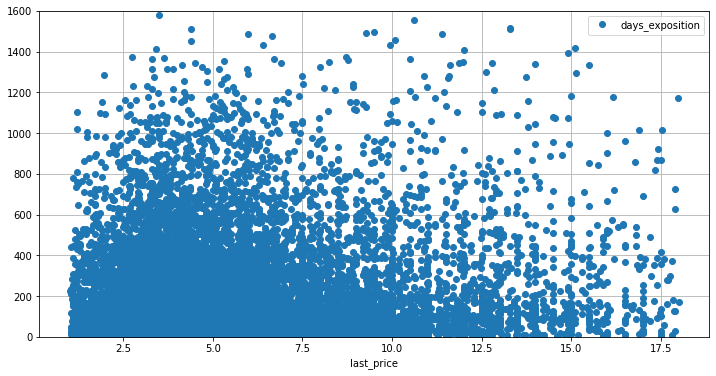

In [175]:
data.plot(x='last_price', y='days_exposition', style='o', ylim=(0,1600), grid=True, figsize=(12, 6));

Очевидной зависимости нет, но вероятно есть тенденция, что при высоких ценах срок реализации увеличивается. Давайте проверим:

In [176]:
m = data['last_price'].median()

In [177]:
data.query('last_price < @m')['days_exposition'].median()

85.0

In [178]:
data.query('last_price > @m')['days_exposition'].median()

107.0

Вероятно, так и есть.

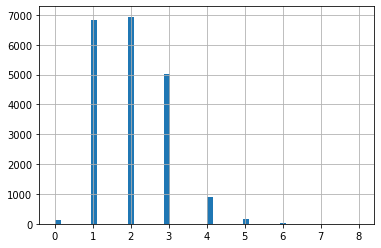

In [179]:
data['rooms'].hist(bins=50, range = (0, 8));

In [180]:
data['rooms'].describe()

count    20027.000000
mean         2.019723
std          0.953089
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Распределение по количеству комнат похоже на распределение Пуассона. Самые распространенные одно- и двух-комнатные квартиры.

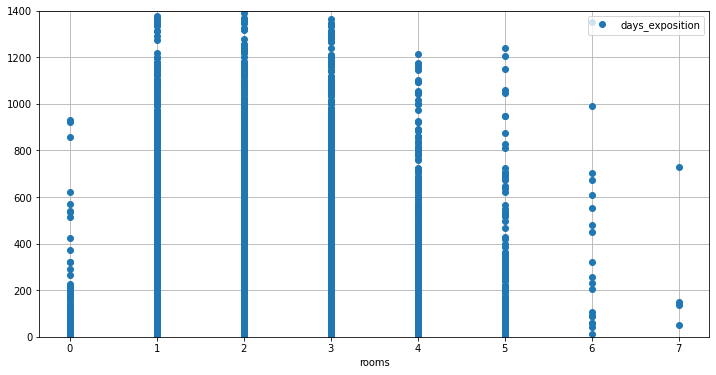

In [181]:
data.plot(x='rooms', y='days_exposition', style='o', ylim=(0,1400), grid=True, figsize=(12, 6));

Зависимость скорости продажи квартиры от количества комнат не очевидна, кроме той, что недвижимость без деления на комнаты быстрее продается, но это может быть также связано с ценой.

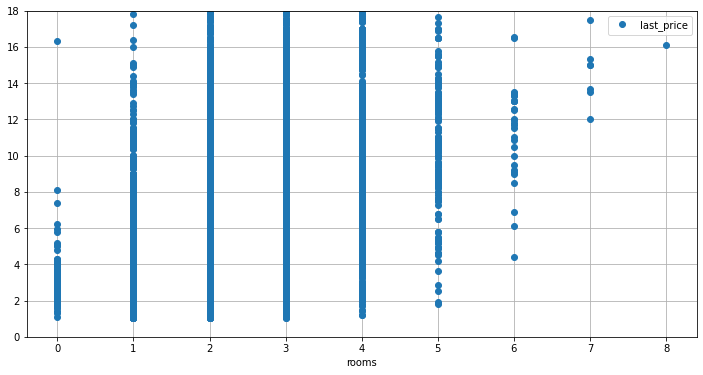

In [182]:
data.plot(x='rooms', y='last_price', style='o', ylim=(0,18), grid=True, figsize=(12, 6));

Прослеживается тенденция, что чем больше комнат, тем выше цена.

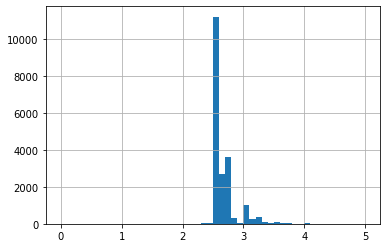

In [183]:
data['ceiling_height'].hist(bins=50, range = (0, 5));

In [184]:
data['ceiling_height'].describe()

count    20027.000000
mean         2.648856
std          0.211301
min          2.250000
25%          2.540000
50%          2.550000
75%          2.700000
max          4.190000
Name: ceiling_height, dtype: float64

Итак, у нас получается, что подавляющее большинство потолов высотой в районе 2,5 метров - видимо это самы распространеннй стандарт. У нас даже получается что граница квартиля и медианы совпадает.  

In [185]:
data.pivot_table(index= ['locality_type', 'realty_type'], values= 'ceiling_height', aggfunc=['median', 'mean', 'count']).reset_index()

locality_type          realty_type         median           mean  \
                                      ceiling_height ceiling_height   
0          Город               Другое          2.565       2.677701   
1          Город             Квартира          2.540       2.649006   
2          Город  Открытая планировка          2.540       2.594857   
3          Город               Студия          2.675       2.681146   
4        Поселок               Другое          2.600       2.647903   
5        Поселок             Квартира          2.600       2.612438   
6        Поселок  Открытая планировка          2.700       2.700000   
7        Поселок               Студия          2.675       2.672500   
8   Село/Деревня               Другое          2.700       2.664607   
9   Село/Деревня             Квартира          2.600       2.620375   
10  Село/Деревня  Открытая планировка          2.750       2.766667   
11  Село/Деревня               Студия          2.725       2.700000   

            count  
   ceiling_height  
0            2066  
1           15626  
2              35  
3              96  
4             186  
5            1329  
6               2  
7               4  
8              89  
9             587  
10              3  
11              4

В городах в среднем потолки ниже, чем за городом. Хотя, в студиях потолки в среднем выше, чем в любом другом типе жилья независимо от места расположения.

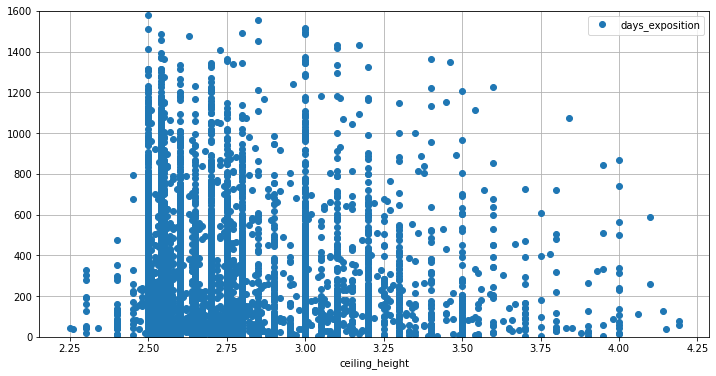

In [186]:
data.plot(x='ceiling_height', y='days_exposition', style='o', ylim=(0,1600), grid=True, figsize=(12, 6));

Завимость количества дней в продаже от высоты потолков не прослеживается.

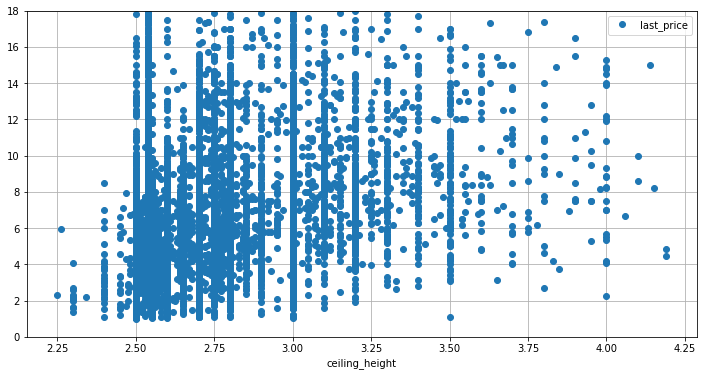

In [187]:
data.plot(x='ceiling_height', y='last_price', style='o', ylim=(0,18), grid=True, figsize=(12, 6));

С ценой тоже не видно прямой зависимость. Возможно есть небольшая тенденция, что чем выше высота потолков - тем выше цена. Можем проверить:

In [188]:
data.query('ceiling_height <= 2.54')['last_price'].median()

4.39

In [189]:
data.query('ceiling_height > 2.54')['last_price'].median()

5.15

Вероятно, это так.

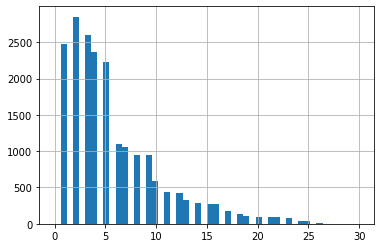

In [190]:
data['floor'].hist(bins=50, range = (0, 30));

In [191]:
data['floor'].describe()

count    20027.000000
mean         5.799071
std          4.722423
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

Распределение этажей похоже на распределение Пуассона. При этом медиана и среднее не так далеки друг от друга - 5-й и 6-й этаж соответственно. Но чаще других выставляются на продажу квартиры на 2-м и 3-м этажах.

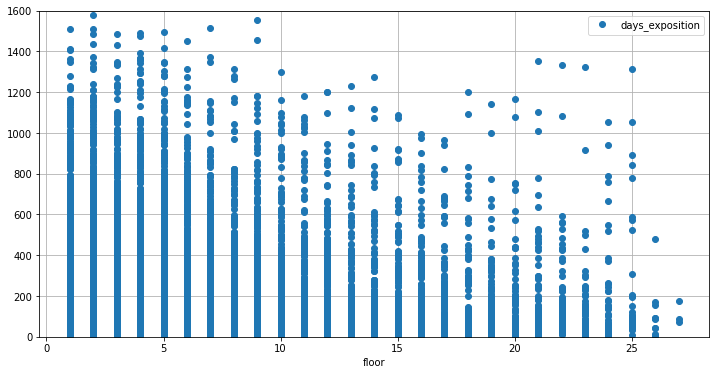

In [192]:
data.plot(x='floor', y='days_exposition', style='o', ylim=(0,1600), grid=True, figsize=(12, 6));

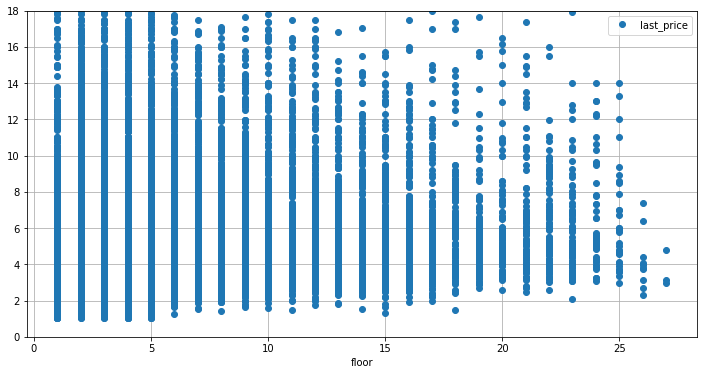

In [193]:
data.plot(x='floor', y='last_price', style='o', ylim=(0,18), grid=True, figsize=(12, 6));

На самом деле по этим графикам  визуально очень сложно определить какую-либо зависимость. Что если рассмотреть в разрезе первый/последний.

In [194]:
data.pivot_table(index= ['floor_type'], values= ['days_exposition', 'last_price'], aggfunc=['median', 'mean', 'count']).reset_index()

floor_type          median                       mean             \
             days_exposition last_price days_exposition last_price   
0     Другой            90.0       4.90      174.146757   5.732970   
1     Первый           115.0       4.10      205.236190   4.605039   
2  Последний           105.0       4.38      192.546118   5.230824   

            count             
  days_exposition last_price  
0           12967      14825  
1            2100       2475  
2            2331       2727

Так у нас получается, что первый этаж в среднем продается дольше и дешевле остальных. При этом последний этаж также не пользуется популярностью и цены на него в среднем ниже, чем на промежуточные между первым и последним. 

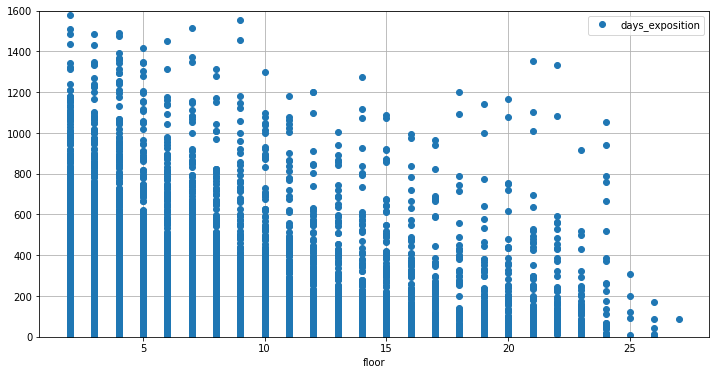

In [195]:
data.query('floor_type == "Другой"').plot(x='floor', y='days_exposition', style='o', ylim=(0,1600), grid=True, figsize=(12, 6));

Действительно, если мы построим график для этажей, кроме первого и последнего, то увидим, что в таком случае больше проослеживается зависимость, что чем выше этаж - тем выше шанс быстрее продать недвижимость.

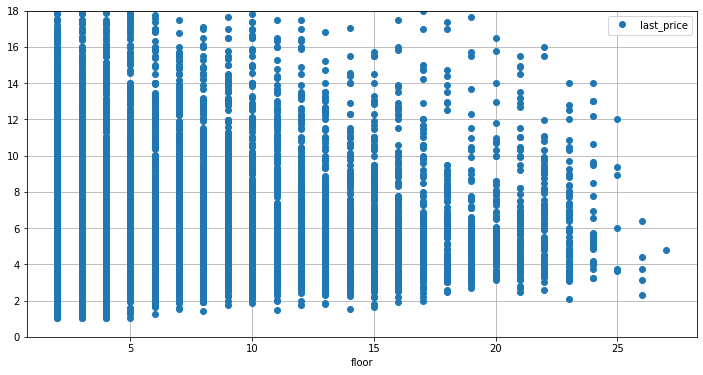

In [196]:
data.query('floor_type == "Другой"').plot(x='floor', y='last_price', style='o', ylim=(0,18), grid=True, figsize=(12, 6));

Для цены такой зависимости не видно, всё-таки распределение более равномерное. Видимо влияние других факторов сильнее.

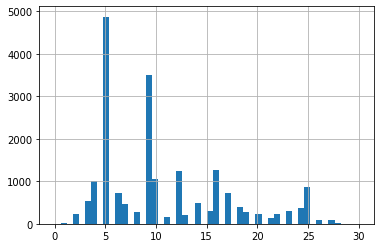

In [197]:
data['floors_total'].hist(bins=50, range = (0, 30));

In [198]:
data['floors_total'].describe()

count    20027.000000
mean        10.616468
std          6.338960
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         29.000000
Name: floors_total, dtype: float64

Судя по графику получается, что квартиры в старых-добрых пятиэтажках чаще других выставляются на продажу. При этом значительно количество и десятиэтажных домов. Поэтому и среднее находится на уровне 11, а медианное смещено к 9.

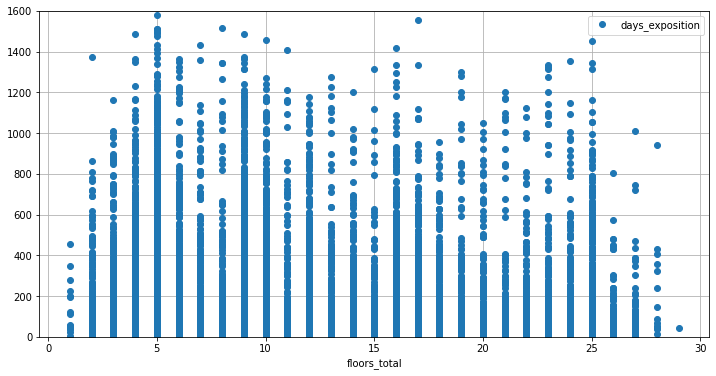

In [199]:
data.plot(x='floors_total', y='days_exposition', style='o', ylim=(0,1600), grid=True, figsize=(12, 6));

Линейной зависимости количества дней в продаже от кол-ва этажей не наблюдается.

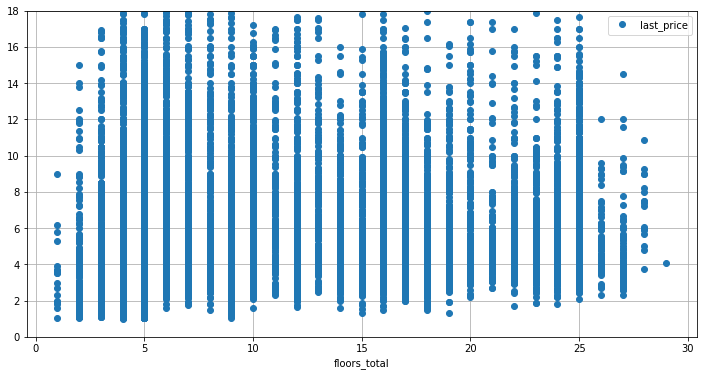

In [200]:
data.plot(x='floors_total', y='last_price', style='o', ylim=(0,18), grid=True, figsize=(12, 6));

Здесть также прямой зависимости не наблюдается.

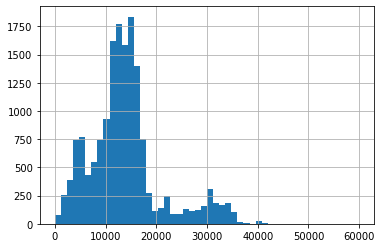

In [201]:
data['cityCenters_nearest'].hist(bins=50, range = (0, 60000));

In [202]:
data['cityCenters_nearest'].describe()

count    16313.000000
mean     13784.704469
std       7172.402127
min        208.000000
25%       9767.000000
50%      13107.000000
75%      16005.000000
max      41792.000000
Name: cityCenters_nearest, dtype: float64

Распределение похоже на нормальное. Очень много недвижимости расположено достаточно близко к центру в радиусе 18 км.

In [203]:
data_nearest = data[['locality_name', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest']]

(0.0, 60000.0)

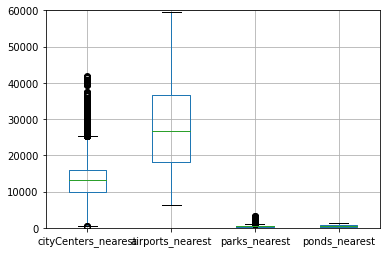

In [204]:
data_nearest.boxplot() 
plt.ylim(0,60000)

Много выбросов, давайте еще усредним данные:

In [205]:
data = data[(data['cityCenters_nearest'].isna()) | (data['cityCenters_nearest'] > 400) | (data['cityCenters_nearest'] < 26000)]

In [206]:
data = data[(data['parks_nearest'].isna()) | (data['parks_nearest'] < 1100)]

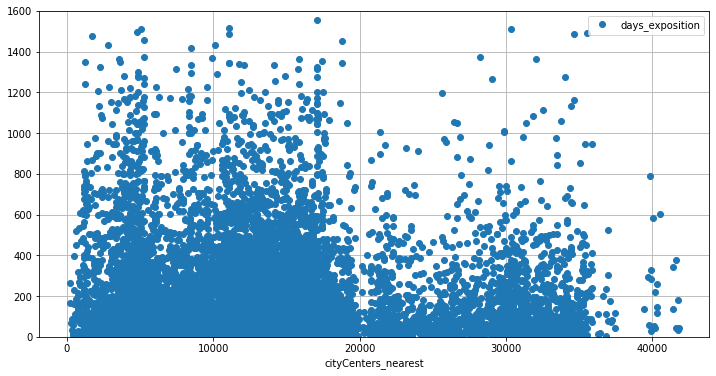

In [207]:
data.plot(x='cityCenters_nearest', y='days_exposition', style='o', ylim=(0,1600), grid=True, figsize=(12, 6));

Не видно сильной зависмости количества дней в продаже от близости к центру города. Возможно больше влияет на цену.

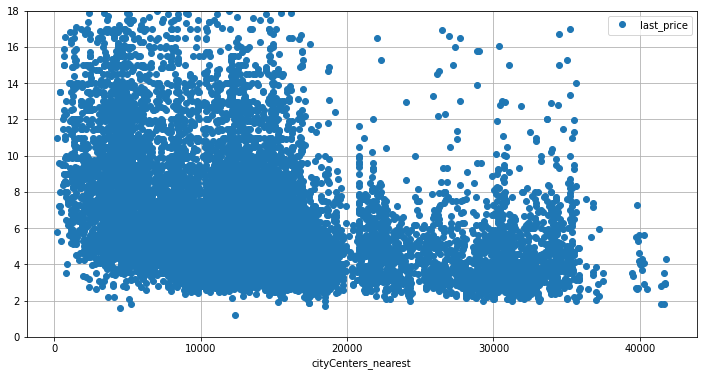

In [208]:
data.query('cityCenters_nearest > 0').plot(x='cityCenters_nearest', y='last_price', style='o', ylim=(0,18), grid=True, figsize=(12, 6));

Да, действительно, здесь завимости более очевидна. С увеличением расстояния до центра города, стоимость недвижимости снижается.

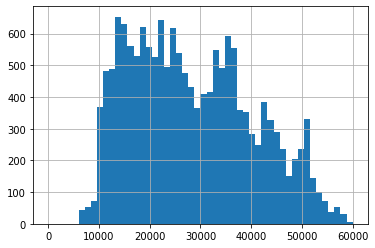

In [209]:
data['airports_nearest'].hist(bins=50, range = (0, 60000));

In [210]:
data['airports_nearest'].describe()

count    16010.000000
mean     28300.944722
std      12012.914569
min       6450.000000
25%      18357.000000
50%      26737.000000
75%      36771.000000
max      59705.000000
Name: airports_nearest, dtype: float64

Распределение похоже на нормальное. И в целом большинство недвижимости расположено на удалении от аэропортов.

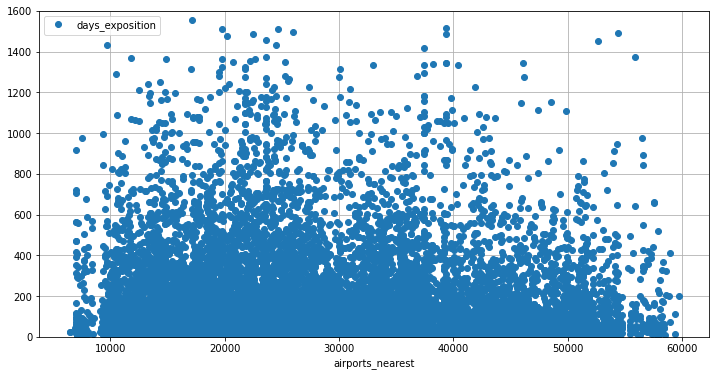

In [211]:
data.plot(x='airports_nearest', y='days_exposition', style='o', ylim=(0,1600), grid=True, figsize=(12, 6));

Зависимость не прослеживается.

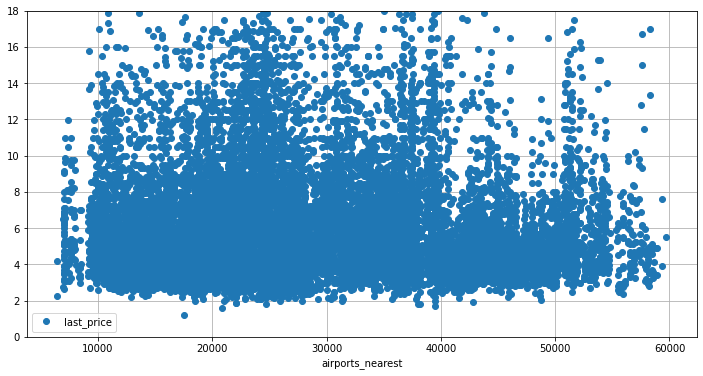

In [212]:
data.plot(x='airports_nearest', y='last_price', style='o', ylim=(0,18), grid=True, figsize=(12, 6));

Тоже сильной завимости нет, но есть тенденция, что недвижимость расположенная очень близко к аэропорту и очень далеко от аэропорта стоит дешевле.

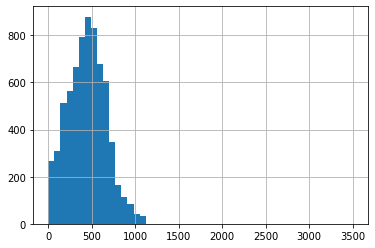

In [213]:
data['parks_nearest'].hist(bins=50, range = (0, 3500));

In [214]:
data['parks_nearest'].describe()

count    6890.000000
mean      445.307257
std       216.171005
min         1.000000
25%       287.000000
50%       446.000000
75%       595.000000
max      1098.000000
Name: parks_nearest, dtype: float64

Распределение похоже стремится к нормальному. Довольно много недвижимости расположено недалеко от парков - в среднем в радиусе примерно 500 метров.

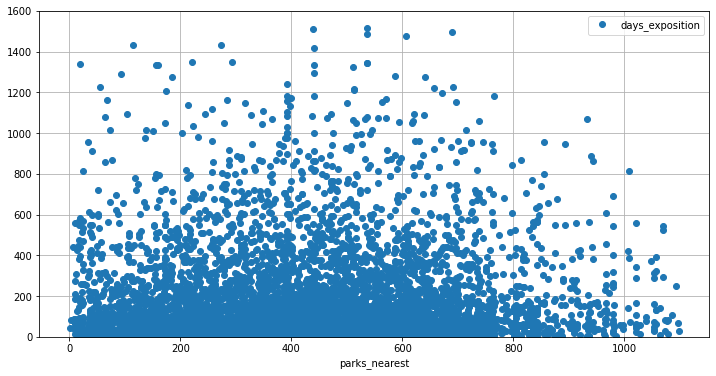

In [215]:
data.plot(x='parks_nearest', y='days_exposition', style='o', ylim=(0,1600), grid=True, figsize=(12, 6));

не совсем понятно, есть ли связь.

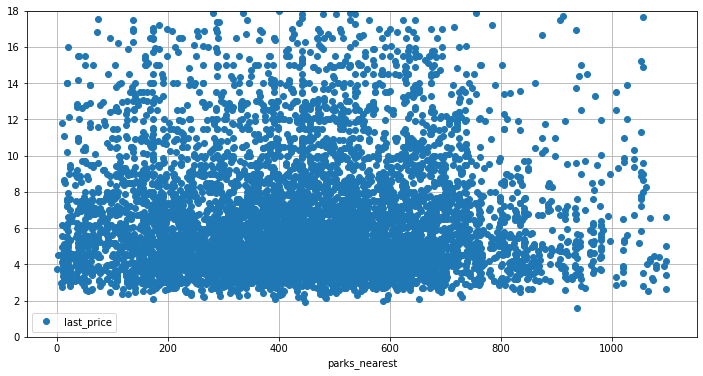

In [216]:
data.plot(x='parks_nearest', y='last_price', style='o', ylim=(0,18), grid=True, figsize=(12, 6));

Аналогично, не просматриваетсмя большой зависимости стоимости неждвижимсости и степени близости парков. Посмотри еще на графике двух параметров: близости парков и водоемов:

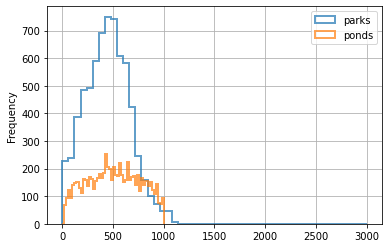

In [217]:
ax = data.plot( kind='hist',y='parks_nearest',histtype='step',range=(0, 3000),bins=50,linewidth=2,alpha=0.7,label='parks')
data.plot(kind='hist',y='ponds_nearest',histtype='step',range=(0, 1000),bins=50,linewidth=2,alpha=0.7,label='ponds',ax=ax,grid=True,legend=True); 

Посмотрим как изменяется цена у недвжижимости, рядом с которой есть и парки и водоемы:

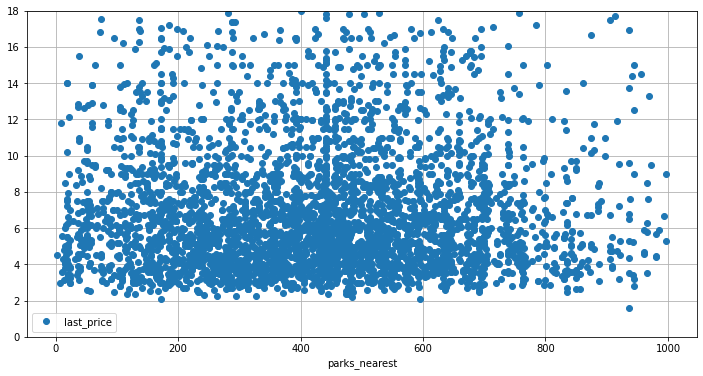

In [218]:
data.query('parks_nearest < 1000 and ponds_nearest < 1000').plot(x='parks_nearest', y='last_price', style='o', ylim=(0,18), grid=True, figsize=(12, 6));

Всё-равно какой-то сильной зависимости не видно. Видимо влияние не велико по сравнению с другими факторами. Посмотрим данные в разрезе наличия парков в радиусе 3000 м.

In [219]:
data.pivot_table(index='locality_type', columns='parks_around3000',values= ['days_exposition', 'last_price'], aggfunc='median').reset_index()

locality_type days_exposition                     last_price  \
parks_around3000                             0     1      2      3          0   
0                        Город            90.0  96.5   99.5  129.0      4.600   
1                      Поселок           105.0  81.0  119.5    NaN      3.100   
2                 Село/Деревня           114.0   NaN    NaN    NaN      2.999   

                                    
parks_around3000    1     2      3  
0                 5.4  5.80  6.595  
1                 3.5  3.55    NaN  
2                 NaN   NaN    NaN

По всей видимости тут какая-то более сложная зависимость. Потому что, например, видно, что в городах количество парков положительно влияет на цену, но в то же время отрицательно на количество дней в продаже (видимо цена все-таки более значимый фактор при выборе в городе). В то же время в поселках ситуация с ценой  аналогичная, а с количеством дней размещения объявления - неоднозначная, но это может быть связано как с  влиянием  других факторов, так и с недостаточностью данных в выборке.

Посмотрим еще, как публикуются объявления:

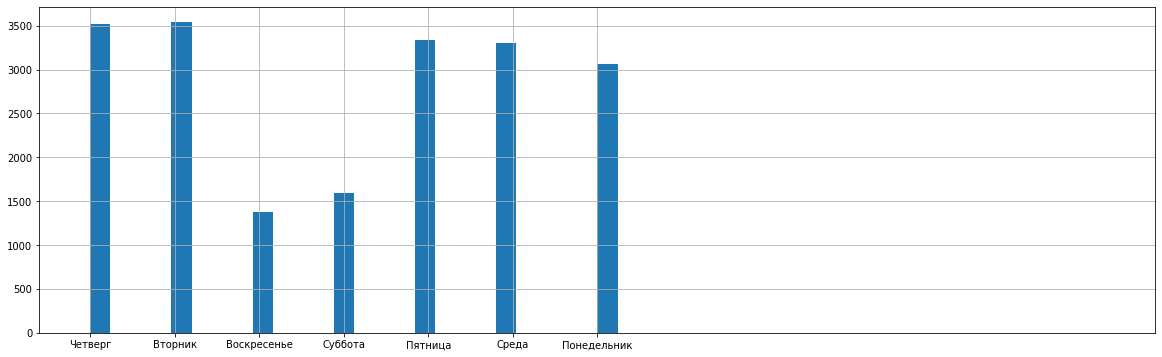

In [220]:
data['weekday_of_advert'].hist(bins=50, range = (0, 12), figsize=(20,6));

Чаще всего по вторникам и четвергам, реже всего по воскресеньям. 

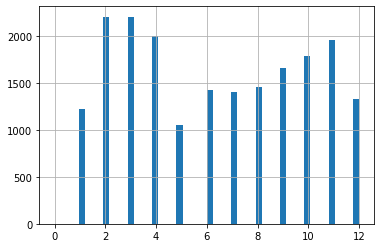

In [221]:
data['month_of_advert'].hist(bins=50, range = (0, 12));

при этом больше всего размещается объявлений в феврале и марте, а меньше всего - в мае.

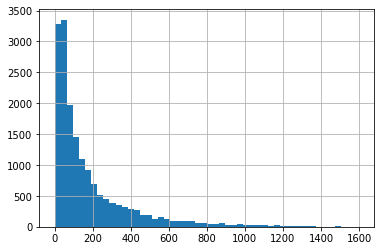

In [222]:
data[data['days_exposition'] != 0]['days_exposition'].hist(bins=50, range = (0, 1600));

In [223]:
data[data['days_exposition'] != 0]['days_exposition'].describe()

count    17140.000000
mean       179.558051
std        218.206774
min          1.000000
25%         44.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Распределение выглядит как распределение Пуассона. Очень большое стандартное отклонение и разница между средним (180) и медианным (95) значением. 

In [224]:
data_expo = data.query('days_exposition > 0')[['locality_type','locality_name','days_exposition']]

(0.0, 1600.0)

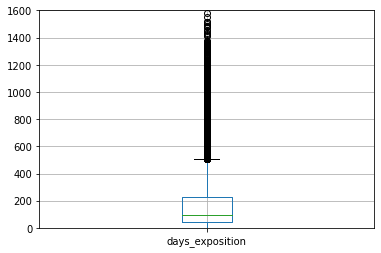

In [225]:
data_expo.boxplot() 
plt.ylim(0,1600)

На диаграмме размаха можно увидеть, что большая часть значений лежит в диапазоне до 225, но при этом медиана смещена к 95, что странно. И у нас есть выбросы, которые отмечены за пределами 500.Посмотрим, где они и какова их доля:

In [226]:
data_expo['over_stock'] = data_expo['days_exposition'] > 500

In [227]:
data_expo.pivot_table(index='locality_name', values='over_stock').sort_values(by='over_stock',  ascending=False)

over_stock
locality_name                              
село Большая Пустомержа                 1.0
село Рабитицы                           1.0
село Мины                               1.0
поселок Глажево                         1.0
поселок Коробицыно                      1.0
...                                     ...
поселок Перово                          0.0
поселок Песочный                        0.0
поселок Петровское                      0.0
поселок Платформа 69-й километр         0.0
село Яльгелево                          0.0

[218 rows x 1 columns]

У нас есть населенные пункты, где все объявления висят больше 500 дней. Видимо что-то не так с этими объявлениями. Посмотрим  все населенные пункты, где доля объявлений, которые висят дольше 500 дней, больше 50%. 

In [228]:
data_not_sale = data_expo.pivot_table(index='locality_name', values='over_stock').query('over_stock > 0.5')
data_not_sale

over_stock
locality_name                      
поселок Глажево            1.000000
поселок Коробицыно         1.000000
поселок Любань             0.666667
село Большая Пустомержа    1.000000
село Зимитицы              1.000000
село Мины                  1.000000
село Рабитицы              1.000000

А их не так уж и много.

In [229]:
data_unsold = data.query('days_exposition >0').query('locality_name in @data_not_sale.index').pivot_table(index=\
['locality_type','locality_name'], values=['square_metre_price','days_exposition', 'total_area'], aggfunc='median').reset_index()

In [230]:
data_average = data.query('days_exposition > 0').pivot_table(index='locality_type', values=['square_metre_price','days_exposition', 'total_area'], aggfunc='median').reset_index()

In [231]:
data_unsold.merge(data_average, on='locality_type')

locality_type            locality_name  days_exposition_x  \
0       Поселок          поселок Глажево              522.0   
1       Поселок       поселок Коробицыно              750.0   
2       Поселок           поселок Любань              654.0   
3  Село/Деревня  село Большая Пустомержа              627.0   
4  Село/Деревня            село Зимитицы              610.0   
5  Село/Деревня                село Мины              540.0   
6  Село/Деревня            село Рабитицы             1007.0   

   square_metre_price_x  total_area_x  days_exposition_y  \
0          28571.428571          56.0              105.0   
1          42361.111111          72.0              105.0   
2          35416.666667          50.0              105.0   
3          28037.383178          53.5              114.0   
4          31896.551724          58.0              114.0   
5          46296.296296          54.0              114.0   
6          34324.942792          43.7              114.0   

   square_metre_price_y  total_area_y  
0          68726.145038          46.0  
1          68726.145038          46.0  
2          68726.145038          46.0  
3          63928.472195          46.0  
4          63928.472195          46.0  
5          63928.472195          46.0  
6          63928.472195          46.0

Вся эта непродающаяся недвижимость находится за городом. При этом цена за кв. метр значительно ниже среднестатистических, а площадь в основном больше. 

In [232]:
data.query('days_exposition >0').query('locality_name in @data_not_sale.index')

total_images  last_price  total_area first_day_exposition  rooms  \
5246              0        2.50        54.0           2017-10-13      2   
12925             7        1.45        50.0           2016-10-10      4   
13542             7        1.85        58.0           2015-07-02      3   
13790            14        1.60        56.0           2017-10-12      2   
14487             9        1.70        48.0           2017-05-04      2   
16028            10        1.50        53.5           2017-07-31      2   
16615            15        3.05        72.0           2015-07-21      3   
23391             8        2.60        50.0           2017-01-26      2   
23540            10        1.50        43.7           2016-06-28      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
5246             2.70           5.0         30.0      3          True   False   
12925            2.50           5.0         37.9      1          True   False   
13542            2.55           5.0         43.3      3          True   False   
13790            2.50           5.0         30.0      5          True   False   
14487            2.50           5.0         30.0      3         False   False   
16028            2.50           3.0         30.0      2          True   False   
16615            2.55           5.0         42.6      5          True   False   
23391            2.50           5.0         27.0      3          True   False   
23540            2.55           3.0         28.0      2          True   False   

       open_plan  kitchen_area  balcony            locality_name  \
5246       False           9.0        2                село Мины   
12925      False           5.9        0           поселок Любань   
13542      False           6.0        0            село Зимитицы   
13790      False          10.0        1          поселок Глажево   
14487      False           7.0        2           поселок Любань   
16028      False           8.0        0  село Большая Пустомержа   
16615      False           9.0        0       поселок Коробицыно   
23391      False           7.0        0           поселок Любань   
23540      False           7.3        1            село Рабитицы   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
5246                NaN                  NaN                 0            NaN   
12925               NaN                  NaN                 0            NaN   
13542               NaN                  NaN                 0            NaN   
13790               NaN                  NaN                 0            NaN   
14487               NaN                  NaN                 0            NaN   
16028               NaN                  NaN                 0            NaN   
16615               NaN                  NaN                 0            NaN   
23391               NaN                  NaN                 0            NaN   
23540               NaN                  NaN                 0            NaN   

       ponds_around3000  ponds_nearest  days_exposition locality_type  \
5246                  0            NaN            540.0  Село/Деревня   
12925                 0            NaN            788.0       Поселок   
13542                 0            NaN            610.0  Село/Деревня   
13790                 0            NaN            522.0       Поселок   
14487                 0            NaN            654.0       Поселок   
16028                 0            NaN            627.0  Село/Деревня   
16615                 0            NaN            750.0       Поселок   
23391                 0            NaN            151.0       Поселок   
23540                 0            NaN           1007.0  Село/Деревня   

      realty_type  Living_%  kitchen_%  square_metre_price weekday_of_advert  \
5246     Квартира  0.522773   0.169873        46296.296296           Пятница   
12925    Квартира  0.522773   0.169873        29000.000000    

Вероятно расположение этих квартир само по себе неудачное или есть какие-то дополнительные факторы, которых нет в данных.

Посмотрим, как меняется кол-во дней размещения объявлений внутри типов населенных пунктов:

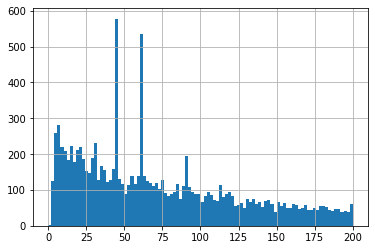

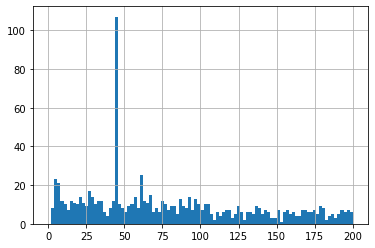

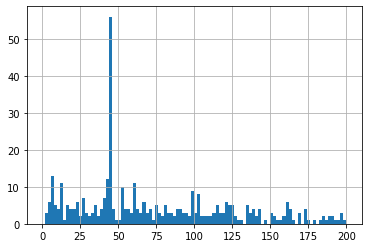

In [233]:
data_expo.query('locality_type == "Город"')['days_exposition'].hist(bins=100,range=(0,200)) 
plt.show()
data_expo.query('locality_type == "Поселок"')['days_exposition'].hist(bins=100,range=(0,200)) 
plt.show()
data_expo.query('locality_type == "Село/Деревня"')['days_exposition'].hist(bins=100,range=(0,200)) 
plt.show()

Если взять основной диапазон распределения значений, то и в городах и поселках структура данных примерно одинаковая. И есть какие-то странные пики в районе 45  и 65 дней.  

In [234]:
data_expo.query('days_exposition > 40 and days_exposition < 70')['days_exposition'].value_counts().head(5)

45.0    639
60.0    474
44.0    102
61.0     96
42.0     92
Name: days_exposition, dtype: int64

Да, действительно, есть значительно большее кол-во квартир, объявления о продаже которых размещались 45 и 60 дней соответственно. Вероятно именно эти данные смещают медианное значение. Возможно не все объявления помечались сразу после продажи, а обновлялись в определенные периоды (раз в 15 дней, например). Посмотрим по городам:

In [235]:
data_expo.query('days_exposition == 60')['locality_name'].value_counts().head(5)

Санкт-Петербург    397
Сестрорецк           9
Пушкин               7
Колпино              7
Всеволожск           7
Name: locality_name, dtype: int64

In [236]:
data_expo.query('days_exposition >= 45 and days_exposition < 46')['locality_name'].value_counts().head(5)

Санкт-Петербург    294
Колпино             24
Всеволожск          22
Сосновый Бор        14
Кириши              13
Name: locality_name, dtype: int64

Итак, большинство этих аномальных данных в Санкт-Петербурге, а там много статистических данных  - что, если нам исключить эти пики:

In [237]:
data_expo['days_exposition'] = data_expo['days_exposition'].astype(int)

In [238]:
data_expo2 = data_expo.query('days_exposition != 45 and days_exposition != 60')

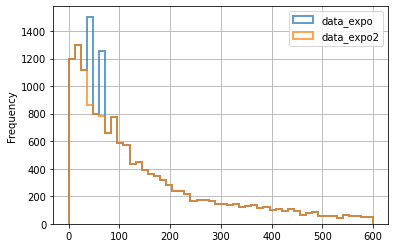

In [239]:
ax = data_expo.plot( kind='hist',y='days_exposition',histtype='step',range=(0, 600),bins=50,linewidth=2,alpha=0.7,label='data_expo')
data_expo2.plot(kind='hist',y='days_exposition',histtype='step',range=(0, 600),bins=50,linewidth=2,alpha=0.7,label='data_expo2',ax=ax,grid=True,legend=True); 

In [240]:
data_expo['days_exposition'].describe()

count    17140.000000
mean       179.558051
std        218.206774
min          1.000000
25%         44.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [241]:
data_expo2['days_exposition'].describe()

count    16027.000000
mean       188.458851
std        222.928350
min          1.000000
25%         41.000000
50%        106.000000
75%        246.000000
max       1580.000000
Name: days_exposition, dtype: float64

Видим, что при удалении из статистики  45 и 60 дней график становится более гладким, что может говорить о том, что природа этих значений не совсем натурально. Возможно какие-то объявления автоматически обновляются не чаще, чем раз в 15 суток.

Посмотрим еще, как влияет день и месяц публикации объявления на количество дней в продаже (год не будем смотреть, так очевидно, что, чем меньше период выборки, тем меньше среднее количество дней):

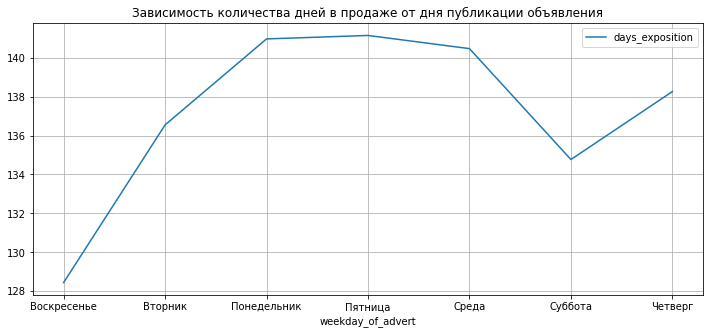

In [242]:
data.query('days_exposition < 600').pivot_table(index='weekday_of_advert', values='days_exposition', aggfunc='mean').plot(grid=True, figsize=(12, 5));
plt.title('Зависимость количества дней в продаже от дня публикации объявления')
plt.show()

По дням неделям получается, что дольше всего остаются в продаже объявления размещенные по понедельникам и пятницам, а быстрее всего продается недвижимость по объявлениям, размещенным в воскресенье.

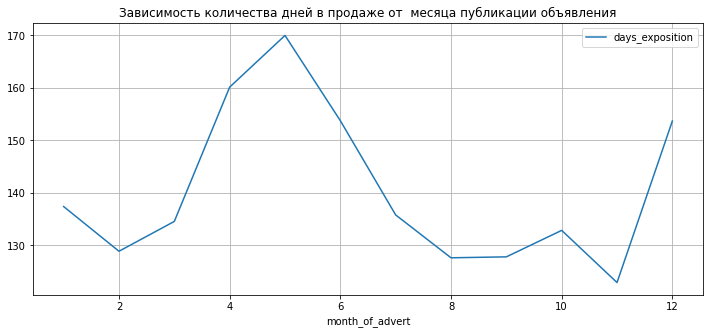

In [243]:
data.query('days_exposition < 600').pivot_table(index='month_of_advert', values='days_exposition', aggfunc='mean').plot(grid=True, figsize=(12, 5));
plt.title('Зависимость количества дней в продаже от  месяца публикации объявления')
plt.show()

Что касается месяцев, то быстрее всего реализуется недвижимость по объявлениям, размещенным в ноябре, а дольше всего - в мае. При этом цены также сильно растут в предновогодний период.

In [244]:
data_expo2.query('locality_type == "Город"').pivot_table(index='locality_name', values='days_exposition', aggfunc=['mean','count']).sort_values(by=('mean','days_exposition')).head(5)

mean           count
              days_exposition days_exposition
locality_name                                
Кронштадт           15.000000               1
Каменногорск        61.000000               3
Сланцы              77.250000               8
Тихвин              80.333333               6
Подпорожье         108.333333               3

In [245]:
data_expo2.query('locality_type == "Поселок" or locality_type == "Село/Деревня"').pivot_table(index='locality_name', values='days_exposition', aggfunc=['mean','count']).sort_values(by=('mean','days_exposition')).head(5)

mean           count
                                days_exposition days_exposition
locality_name                                                  
поселок Новогорелово                        4.0               3
поселок Заводской                           5.0               1
поселок Счастье                             7.0               1
поселок Платформа 69-й километр            18.0               1
село Малые Колпаны                         19.5               2

Из городов недвижимость быстрее всего продается в Сосновом бору и Сланцах, из поселков - в Новогорелово.

Мы ранее установили некоторую зависимость скорости продажит и цены. Посмотрим от чего еще может зависеть цена.

In [246]:
data_last_price = data[['locality_name', 'realty_type', 'last_price','total_area', 'living_area', 'kitchen_area','rooms', 'floor_type','weekday_of_advert', 'month_of_advert', 'year_of_advert']]

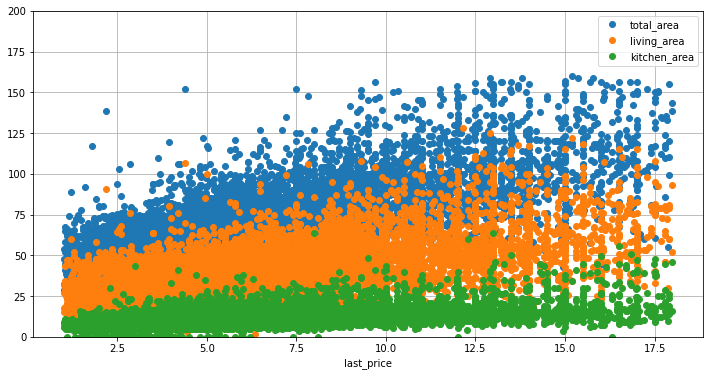

In [247]:
data_last_price.plot(x='last_price', y=['total_area', 'living_area', 'kitchen_area'], style='o', ylim=(0, 200), grid=True, figsize=(12, 6));

Как мы видим на графике, общая площадь, жилая площадь и площадь кухни пропорционально положительно влияют на стоимость - чем больше площадь, тем выше цена. Больше всего на цену влияет общая площадь, меньше всего - площадь кухни. 

In [248]:
data.pivot_table(index='realty_type', values= ['total_area', 'last_price'], aggfunc='mean').reset_index()

realty_type  last_price  total_area
0               Другое    5.570593   58.070435
1             Квартира    5.506272   56.379499
2  Открытая планировка    3.391175   32.657500
3               Студия    3.321509   29.165294

При этом можно отметить, что минимальной ценой обладает недвижимость с минимальной общей площадью и без отдельной кухни - то есть студии и кваритры с общей планировкой.

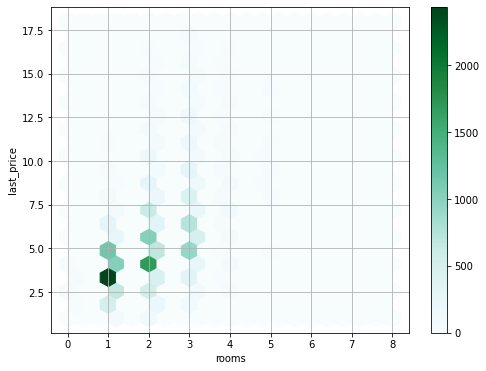

In [249]:
data_last_price.plot(x='rooms', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True); 

Тут мы видим, что чаще всего выставляются на продажу однокомнатные квартиры по цене около 3 млн. руб. При этом по графику видно, что, чем больше комнат, тем выше цена.

Посмотрим, как у нас устанавливается цена в зависимости от дня, месяца и года объявления о продаже:

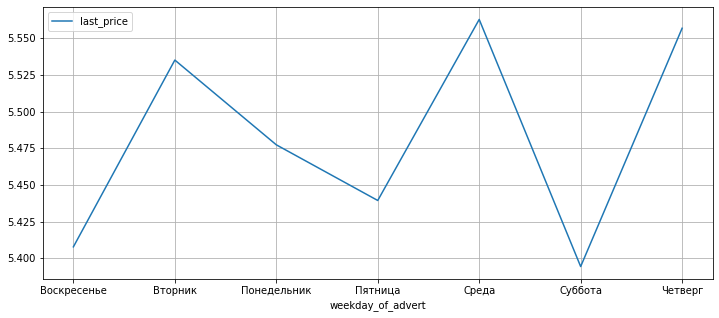

In [250]:
data_last_price.pivot_table(index='weekday_of_advert', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5));

По дням неделям получается, что дороже квартиры чаще всего выставляют по средам и четвергам, а дешевле всего - по субботам и воскресеньям, цена также сильно снижается в пятницую

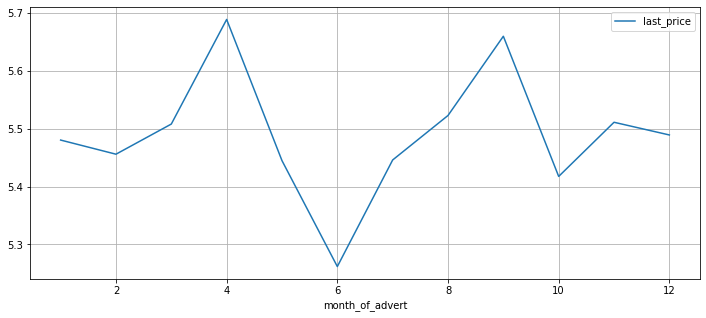

In [251]:
data_last_price.pivot_table(index='month_of_advert', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5));

Что касается месяцев, то цены варьируются. Пик скачка цен наблюдается в конце марта - начале апреля, а самые низкие цены в конце мая - начале июня. 

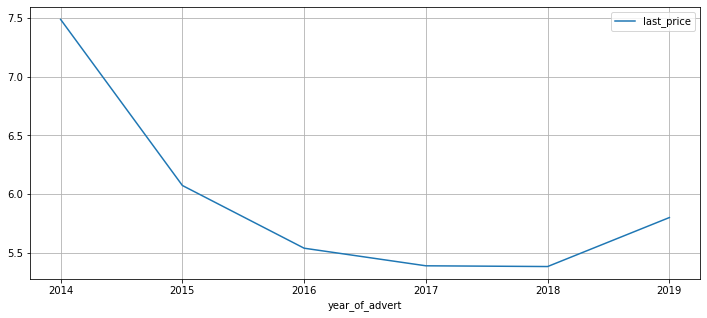

In [252]:
data_last_price.pivot_table(index='year_of_advert', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5));

Если говорить о статистике по годам, то мы видим, что был определенный тренд на снижение цен с 2014 года, который в 2017 году поменялся на противоположный и вплоть до 2019 цены продолжают расти. Можно еще понаблюдать теже тенденции на общем графике:

In [253]:
data_seaborn = data[['weekday_of_advert', 'month_of_advert','year_of_advert', 'last_price']]

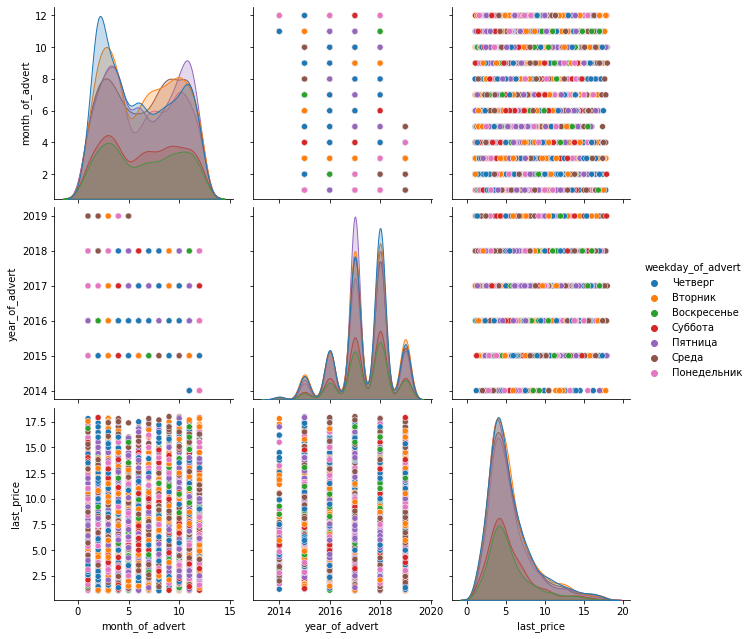

In [254]:
sbn.pairplot(data_seaborn, hue="weekday_of_advert", height=3);

Посмотрим на цену квадратного метра в разрезе населенного пункта.

In [255]:
data_filter = data.pivot_table(index='locality_name', values=['last_price'], aggfunc='count').sort_values(by\
='last_price', ascending=False).reset_index().query('index < 10').rename(columns={'last_price':'qty'})

In [256]:
data_filter 

locality_name    qty
0  Санкт-Петербург  14368
1       Всеволожск    393
2           Пушкин    356
3          Колпино    324
4   поселок Шушары    215
5   поселок Мурино    214
6     Красное Село    173
7         Петергоф    165
8       Сестрорецк    163
9          Гатчина    149

In [257]:
data_square_metre = data_filter.merge(data.pivot_table(index='locality_name', values='square_metre_price', aggfunc='mean').reset_index(), on='locality_name')

In [258]:
data_square_metre.reset_index(drop=True)

locality_name    qty  square_metre_price
0  Санкт-Петербург  14368       107880.823856
1       Всеволожск    393        67309.557534
2           Пушкин    356       101749.749145
3          Колпино    324        75307.719720
4   поселок Шушары    215        79244.869320
5   поселок Мурино    214        87138.590997
6     Красное Село    173        72141.925025
7         Петергоф    165        84385.555494
8       Сестрорецк    163       101388.741799
9          Гатчина    149        69992.693801

Итак, из 10-и самых распространенных в объявлениях населенных пунктов, самая дорогая стоимость квадратного метра в Санкт-Петрербурге и Пушкине, дешевле всего  недвижимость стоит в Кронштадте.

Посмотрим, как зависит стоимость от удаленности от центра.

In [259]:
data_spb = data.query('locality_name ==  "Санкт-Петербург"')[['locality_name', 'last_price', 'city_centre_km']]

In [260]:
data_spb_1 = data_spb.pivot_table(index='locality_name', values= ['last_price','city_centre_km'] , aggfunc='mean').reset_index()
data_spb_1['price_per_km'] = data_spb_1['last_price']/data_spb_1['city_centre_km']
data_spb_1

locality_name  city_centre_km  last_price  price_per_km
0  Санкт-Петербург       11.928163    6.229437      0.522246

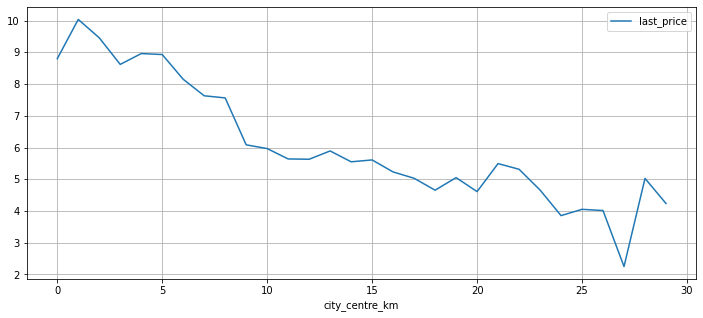

In [261]:
data_spb.pivot_table(index='city_centre_km', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5));

In [262]:
data_spb.pivot_table(index='city_centre_km', values='last_price', aggfunc=['mean','count']).reset_index()

city_centre_km       mean      count
                  last_price last_price
0             0.0   8.798000         10
1             1.0  10.035319        141
2             2.0   9.456978        231
3             3.0   8.619077        302
4             4.0   8.960105        582
5             5.0   8.929868        692
6             6.0   8.150229        464
7             7.0   7.630281        325
8             8.0   7.562613        524
9             9.0   6.084795        544
10           10.0   5.966778        663
11           11.0   5.640083       1103
12           12.0   5.630525       1571
13           13.0   5.892116       1416
14           14.0   5.549788       1226
15           15.0   5.608739       1526
16           16.0   5.230812       1240
17           17.0   5.031234        836
18           18.0   4.655598        245
19           19.0   5.051410        156
20           20.0   4.611579         19
21           21.0   5.493469        117
22           22.0   5.314640        200
23           23.0   4.661671         82
24           24.0   3.854430         26
25           25.0   4.052840         26
26           26.0   4.014287         43
27           27.0   2.250000          1
28           28.0   5.026429          7
29           29.0   4.236667          6

Итак, у нас получается, что средняя цена за км от центра составляет около 500 тыс. руб. При этом по графику мы видим, как уменьшается цена при отдалении от центра (Есть аномалии в диапазоне от 27 до 30 км, но это скорее связано с недостатком статистики, так как в этом диапазоне очень мало значений). 

### ВЫВОД

В ходе данного проекта был обработан массив данных со статистикой о размещении объявлений о продаже недвижимости в Санкт-Петербурге и области. В процессе предобработки данных выяснилось, что не все данные предоставлены корректно, а часть по тем или иным причинам не заполнена. В целях повышения качества исследования, часть усредненных данных была восстановлена или удалена.  

В процессе исследования было выясненно, что:

Самае дорогая недвиджимость - с неопределенным типом, а самая дешевая - студия:

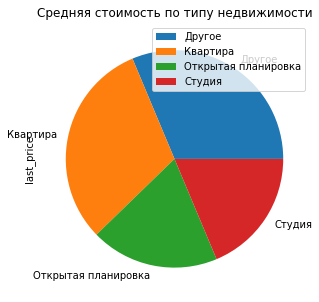

In [263]:
data.pivot_table(index='realty_type', values='last_price', aggfunc='mean').plot(kind='pie', y='last_price', grid=True, figsize=(12, 5));
plt.title('Средняя стоимость по типу недвижимости')
plt.show()

Самая дорогая недвжимость - в Санкт-Петербурге, Пушкине и Сестрорецке.

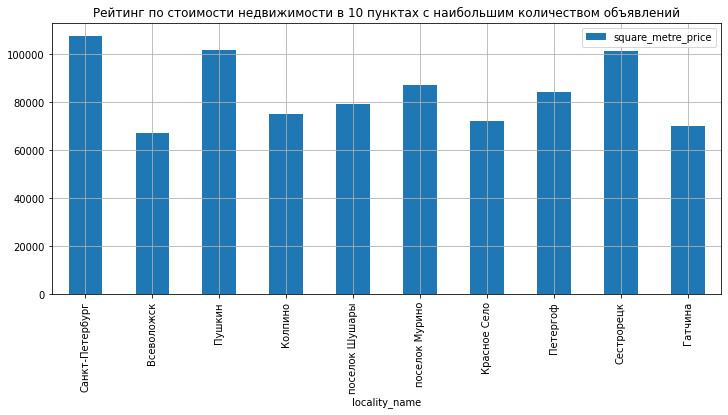

In [264]:
data_square_metre.plot(kind='bar', x='locality_name', y='square_metre_price', grid=True, figsize=(12, 5));
plt.title('Рейтинг по стоимости недвижимости в 10 пунктах с наибольшим количеством объявлений')
plt.show()

При этом во всех населенных пунктах распределение по цене единообразно и похоже на распределение Пуассона.

In [265]:
#for name, group_data in data.groupby('locality_name'):
    #data.plot(kind='hist', title=name, y='last_price', bins=50);

Мы также выяснили, что цена на недвижимости зависит от многих факторов, помимо местонахождения и типа недвижимости,таких как:

 - Общая площадь, жилая площадь и площадь кухни:

In [266]:
data.pivot_table(index='last_price', values=['living_area','total_area', 'kitchen_area']).reset_index().corr()

last_price  kitchen_area  living_area  total_area
last_price      1.000000      0.643728     0.742266    0.846402
kitchen_area    0.643728      1.000000     0.416702    0.626900
living_area     0.742266      0.416702     1.000000    0.932261
total_area      0.846402      0.626900     0.932261    1.000000

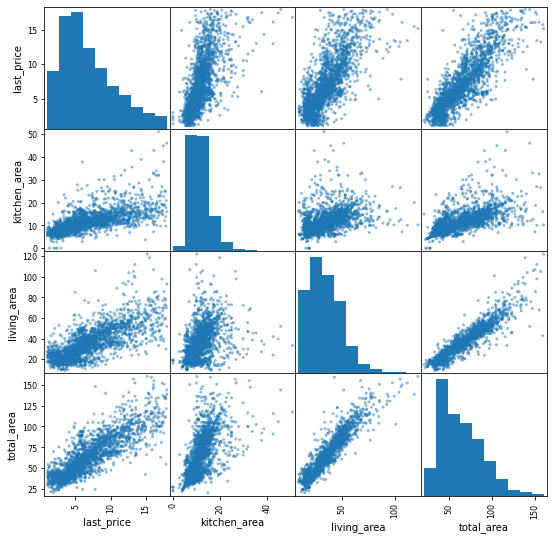

In [267]:
pd.plotting.scatter_matrix(data.pivot_table(index='last_price', values=['living_area','total_area', 'kitchen_area']).reset_index(), figsize=(9, 9));

Как видим на графике, корелляция положительная, то есть, чем больше площадь, тем в среднем выше стоимость.

- От количества комнат и высоты потолков:

In [268]:
data.pivot_table(index='last_price', values=['rooms','ceiling_height']).reset_index().corr()

last_price  ceiling_height     rooms
last_price        1.000000        0.405829  0.622616
ceiling_height    0.405829        1.000000  0.257502
rooms             0.622616        0.257502  1.000000

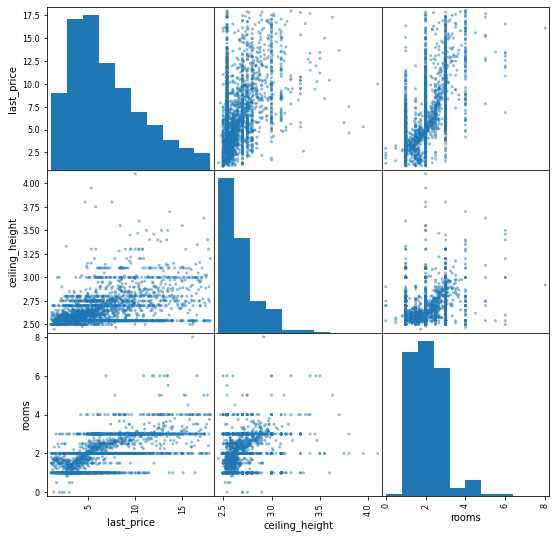

In [269]:
pd.plotting.scatter_matrix(data.pivot_table(index='last_price', values=['rooms','ceiling_height']).reset_index(), figsize=(9, 9));

Корреляция положительная - чем больше комнат и выше потолки, тем выше цена.

- Наличие балконов:

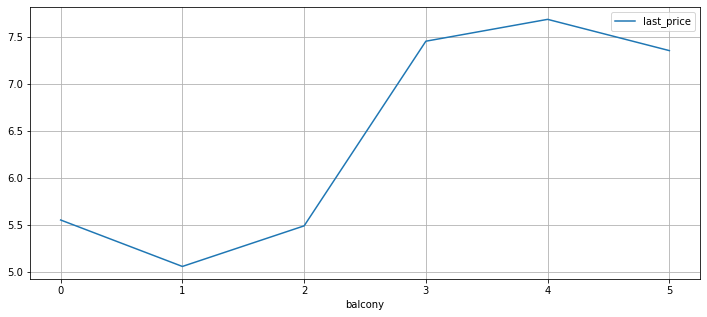

In [270]:
data.pivot_table(index='balcony', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5));

In [271]:
data.pivot_table(index='balcony', values= ['last_price', 'total_area'], aggfunc=['mean', 'count']).reset_index()

balcony       mean                 count           
          last_price total_area last_price total_area
0       0   5.549970  56.896634      12530      12530
1       1   5.054504  53.447185       3531       3531
2       2   5.487403  54.878980       3197       3197
3       3   7.456931  78.216389         72         72
4       4   7.689966  74.327500        148        148
5       5   7.356532  73.958206        262        262

В целом по графику мы видим, что балконы положительно влияют на цену. Есть искажение при нуле и пяти, но это вероятно связано с тем, что в данных случаях  сильное влияние оказывает площадь, так как в этих случаях средняя площадь отклоняется в большую или меньшую сторону соответственно.  

- Этаж:

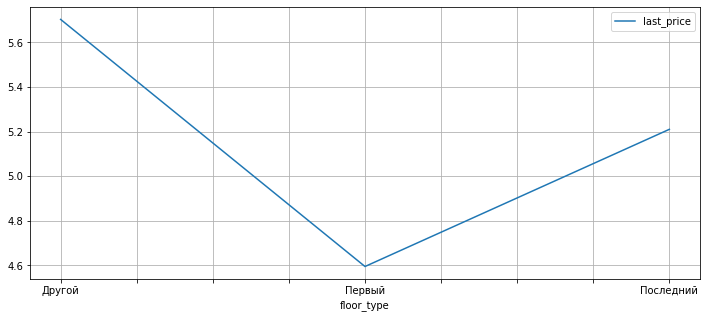

In [272]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5));

Мы выяснили, что ниже всего цена на недвижимость на первом этаже. Но цены на недвижимость на последнем этаже также снижают.

- Наличие поблизости аэропортов, парков и водоемов.

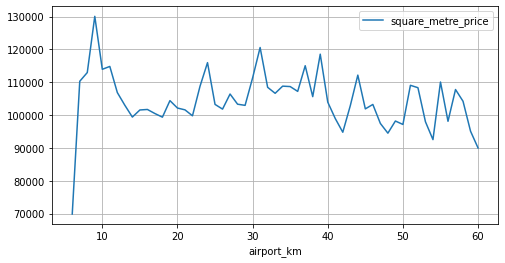

In [273]:
data['airport_km'] = np.round((data['airports_nearest']/1000))
data.pivot_table(index='airport_km', values='square_metre_price', aggfunc='mean').plot(grid=True,figsize=(8, 4));

Можно проследить, как меняется цена в зависимости от близости аэропорта, но какие-то однозначные выводы сделать сложно. Можно предположить, что в большей степени влияет расположение взлетно-посадочной полосы или уровень шума.

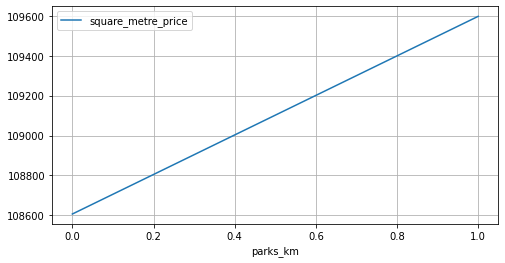

In [274]:
data['parks_km'] = np.round((data['parks_nearest']/1000))
data.pivot_table(index='parks_km', values='square_metre_price', aggfunc='mean').plot(grid=True,figsize=(8, 4));

Цены выше, если парк не совсем близко, но и не совсем далеко. Наибольшая цена, если парк в радиусе 2 км. При этом отсутствие парков поблизости снижает цену недвижимости. 

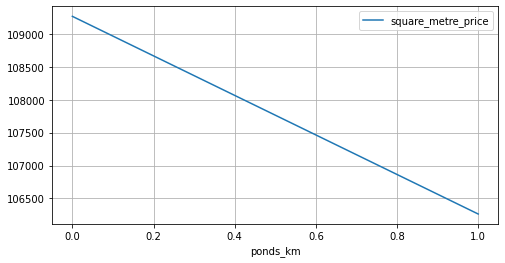

In [275]:
data['ponds_km'] = np.round((data['ponds_nearest']/1000))
data.pivot_table(index='ponds_km', values='square_metre_price', aggfunc='mean').plot(grid=True,figsize=(8, 4));

Чем ближе водоем, тем выше цена за квадратный метр.

- Также мы установили, что цена зависит от дня недели, месяца и года публикации объявления. Самые дорогие объявления могут быть по вторникам и четвергам в декабре. 

Возможно было бы полезно добавить в данные информацию о наличии поблизости школ и детских садов - вероятно эти факторы также влияют на стоимость.

Проанализировали  подробно и количество дней  размещения объявлений о продаже:

In [276]:
data.pivot_table(index='days_exposition', values=['total_images','last_price']).reset_index().corr()

days_exposition  last_price  total_images
days_exposition         1.000000    0.248297     -0.196226
last_price              0.248297    1.000000     -0.036803
total_images           -0.196226   -0.036803      1.000000

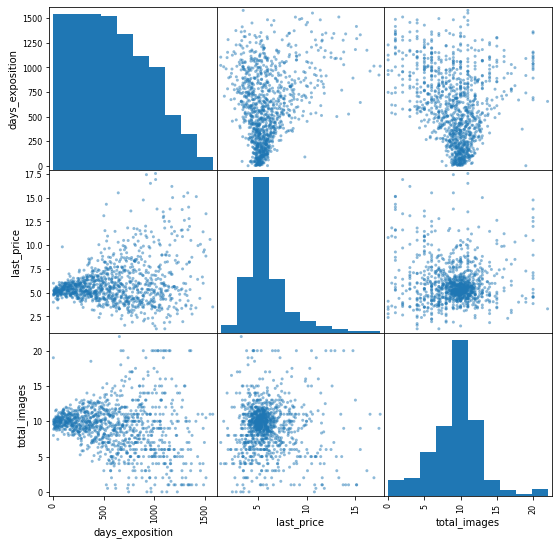

In [277]:
pd.plotting.scatter_matrix(data.pivot_table(index='days_exposition', values=['total_images','last_price']).reset_index(), figsize=(9, 9));

И установили, что на скорость продажи недвижимости влияют:
цена - чем выше цена, тем дольше продается квартира;
количество изображений в карточке - чем меньше изображений, тем дольше недвижимость остается непроданной. 
Также можно предположить, что раз на скорость продажи влияет цена, то и все факторы, влияющие на цену, в той или иной степени влияют и на скорость продажи.